#Rough Set

In [ ]:
#Impor Library Rough Set
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("bodyfat.csv",sep=',')
df

Density  Age    Weight   Height  Neck  Chest  Abdomen    Hip  Thigh  \
0     1.0708   23  69.96700  172.085  36.2   93.1     85.2   94.5   59.0   
1     1.0853   22  78.58500  183.515  38.5   93.6     83.0   98.7   58.7   
2     1.0414   22  69.85300  168.275  34.0   95.8     87.9   99.2   59.6   
3     1.0751   26  83.80100  183.515  37.4  101.8     86.4  101.2   60.1   
4     1.0340   24  83.57400  180.975  34.4   97.3    100.0  101.9   63.2   
..       ...  ...       ...      ...   ...    ...      ...    ...    ...   
247   1.0736   70  60.89500  170.180  34.9   89.2     83.6   88.8   49.6   
248   1.0236   72  91.17200  177.165  40.9  108.5    105.0  104.5   59.6   
249   1.0328   72  84.70800  167.640  38.9  111.1    111.5  101.7   60.3   
250   1.0399   72  86.52300  179.070  38.9  108.3    101.3   97.8   56.0   
251   1.0271   70  94.12034  177.800  40.8  112.4    108.5  107.1   59.3   

     Knee  Ankle  Biceps  Forearm  Wrist  BodyFat  
0    37.3   21.9    32.0     27.4   17.1     12.3  
1    37.3   23.4    30.5     28.9   18.2      6.1  
2    38.9   24.0    28.8     25.2   16.6     25.3  
3    37.3   22.8    32.4     29.4   18.2     10.4  
4    42.2   24.0    32.2     27.7   17.7     28.7  
..    ...    ...     ...      ...    ...      ...  
247  34.8   21.5    25.6     25.7   18.5     11.0  
248  40.8   23.2    35.2     28.6   20.1     33.6  
249  37.3   21.5    31.3     27.2   18.0     29.3  
250  41.6   22.7    30.5     29.4   19.8     26.0  
251  42.2   24.6    33.7     30.0   20.9     26.0  

[252 rows x 15 columns]

In [ ]:
df=df.iloc[::,1:]         
#df1=df.iloc[::,:-1] #memisahkan antara variabel x dan y
df

Age    Weight   Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  Ankle  \
0     23  69.96700  172.085  36.2   93.1     85.2   94.5   59.0  37.3   21.9   
1     22  78.58500  183.515  38.5   93.6     83.0   98.7   58.7  37.3   23.4   
2     22  69.85300  168.275  34.0   95.8     87.9   99.2   59.6  38.9   24.0   
3     26  83.80100  183.515  37.4  101.8     86.4  101.2   60.1  37.3   22.8   
4     24  83.57400  180.975  34.4   97.3    100.0  101.9   63.2  42.2   24.0   
..   ...       ...      ...   ...    ...      ...    ...    ...   ...    ...   
247   70  60.89500  170.180  34.9   89.2     83.6   88.8   49.6  34.8   21.5   
248   72  91.17200  177.165  40.9  108.5    105.0  104.5   59.6  40.8   23.2   
249   72  84.70800  167.640  38.9  111.1    111.5  101.7   60.3  37.3   21.5   
250   72  86.52300  179.070  38.9  108.3    101.3   97.8   56.0  41.6   22.7   
251   70  94.12034  177.800  40.8  112.4    108.5  107.1   59.3  42.2   24.6   

     Biceps  Forearm  Wrist  BodyFat  
0      32.0     27.4   17.1     12.3  
1      30.5     28.9   18.2      6.1  
2      28.8     25.2   16.6     25.3  
3      32.4     29.4   18.2     10.4  
4      32.2     27.7   17.7     28.7  
..      ...      ...    ...      ...  
247    25.6     25.7   18.5     11.0  
248    35.2     28.6   20.1     33.6  
249    31.3     27.2   18.0     29.3  
250    30.5     29.4   19.8     26.0  
251    33.7     30.0   20.9     26.0  

[252 rows x 14 columns]

In [ ]:
#melakukan encoding (mengganti kategori menjadi angka)
#df['quality'].value_counts()

In [ ]:
#Encoding dengan data sedikit
#cleanup_nums = {"quality":     {"good": 2, "bad": 1}}
#df = df.replace(cleanup_nums)
#df

#Core and Reduct

In [ ]:
def indiscrenibility(faktor):
    df_r = faktor.groupby(list(faktor)).apply(lambda x: tuple(x.index)).tolist()
    df_baru=[]
    for i in df_r:
        dfb=list(i)
        df_baru.append(dfb)
    return df_baru

In [ ]:
def Core_and_Reduct(faktor):
    R=indiscrenibility(faktor)
    kolom=list(faktor.columns)
    indis_vector=[]
    for k in kolom:
        k=str(k) 
        df2=faktor.drop(columns=[k])
        K=indiscrenibility(df2)
        if (K==R):
            indis=True
            indis_vector.append(indis) 
        else:
            indis=False
            indis_vector.append(indis) 
    
    indeks = []
    for i in range(len(indis_vector)):
        if indis_vector[i] == False:
            indeks.append(i)
    indis_var = [kolom[i] for i in indeks] 
    df_CR=faktor[indis_var]
    # Mengembalikan Faktor Utama
    df_CR['BodyFat']=faktor.iloc[::,-1]
    return df_CR

In [ ]:
df_CR=Core_and_Reduct(df)
df_CR

Age    Weight   Height  BodyFat
0     23  69.96700  172.085     12.3
1     22  78.58500  183.515      6.1
2     22  69.85300  168.275     25.3
3     26  83.80100  183.515     10.4
4     24  83.57400  180.975     28.7
..   ...       ...      ...      ...
247   70  60.89500  170.180     11.0
248   72  91.17200  177.165     33.6
249   72  84.70800  167.640     29.3
250   72  86.52300  179.070     26.0
251   70  94.12034  177.800     26.0

[252 rows x 4 columns]

In [ ]:
df_CR.to_csv('hasilroughset.csv') 

#Fuzzy

In [ ]:
#Impor Library SK - Fuzzy
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import sys
np.set_printoptions(threshold=sys.maxsize)
import seaborn as sns
%matplotlib inline

warnings.filterwarnings('ignore')

In [ ]:
df_tsk=pd.read_csv('hasilroughset.csv',sep=',')
df_tsk

Unnamed: 0  Age    Weight   Height  BodyFat
0             0   23  69.96700  172.085     12.3
1             1   22  78.58500  183.515      6.1
2             2   22  69.85300  168.275     25.3
3             3   26  83.80100  183.515     10.4
4             4   24  83.57400  180.975     28.7
..          ...  ...       ...      ...      ...
247         247   70  60.89500  170.180     11.0
248         248   72  91.17200  177.165     33.6
249         249   72  84.70800  167.640     29.3
250         250   72  86.52300  179.070     26.0
251         251   70  94.12034  177.800     26.0

[252 rows x 5 columns]

In [ ]:
df_tsk=df_tsk.drop(columns=['Unnamed: 0'])      #diilangin kolom
df_tsk

Age    Weight   Height  BodyFat
0     23  69.96700  172.085     12.3
1     22  78.58500  183.515      6.1
2     22  69.85300  168.275     25.3
3     26  83.80100  183.515     10.4
4     24  83.57400  180.975     28.7
..   ...       ...      ...      ...
247   70  60.89500  170.180     11.0
248   72  91.17200  177.165     33.6
249   72  84.70800  167.640     29.3
250   72  86.52300  179.070     26.0
251   70  94.12034  177.800     26.0

[252 rows x 4 columns]

In [ ]:
df_tsk.describe()

Age      Weight      Height     BodyFat
count  252.000000  252.000000  252.000000  252.000000
mean    44.869048   81.158692  178.177976   19.127381
std     12.567694   13.330694    9.303654    8.341138
min     22.000000   53.751000   74.930000    0.000000
25%     35.750000   72.121500  173.355000   12.475000
50%     43.000000   80.059000  177.800000   19.200000
75%     54.000000   89.358000  183.515000   25.300000
max     81.000000  164.722000  197.485000   47.500000

In [ ]:
df_tsk.isnull().sum()    #untuk mengecek nilai yang hilang

Age        0
Weight     0
Height     0
BodyFat    0
dtype: int64

In [ ]:
df_tsk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      252 non-null    int64  
 1   Weight   252 non-null    float64
 2   Height   252 non-null    float64
 3   BodyFat  252 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 8.0 KB


#Info Atribute
1. Age (years)
2. Density
3. Weight (lbs)
4. Height (inches)
5. Neck circumference (cm)
6. Chest circumference (cm)
7. Abdomen 2 circumference (cm)
8. Hip circumference (cm)
9. Thigh circumference (cm)
10. Knee circumference (cm)
11. Ankle circumference (cm)
12. Biceps (extended) Circumference (cm) 
13. Forearm circumference (cm)
14. Wrist circumference (cm)
15. bodyfat



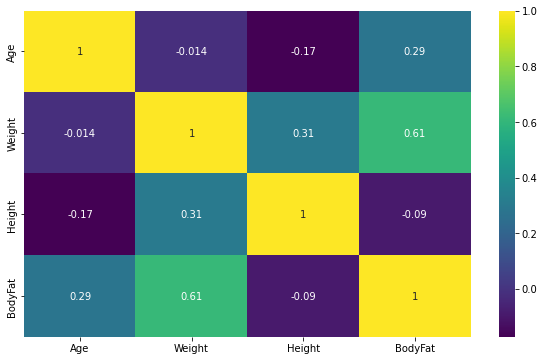

In [ ]:
#untuk melihat korelasi data
k=len(df_tsk.columns)
cm=df_tsk.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap='viridis')

# Fuzzyfikasi

##Fuzzy A

In [ ]:
def fungsi_segitiga(x, amb):
    """
    Fungsi Keanggotaan Segitiga.
    Parameter:
    ----------
    x   : Array 1 dimensi, semesta himpunan x  
    amb : Array 1 dimensi, terdiri dari 3 elemen a, m, b, yang mana a<=m<=b
    
    Hasil
    -------
    miu   : Array 1 dimensi fungsi keanggotaan segitiga 
    
    Fungsi keanggotaan segitiga:
    """
    assert len(amb) == 3, 'parameter amb harus tepat tiga elemen'
    a, m, b = np.r_[amb]    # Zero-indexing di Python
    assert a <= m and m <= b, 'paremeter harus memenuhi syarat berikut: a <= m <= b.'

    miu = np.zeros(len(x))

    # Sisi Kiri
    if a != m:
        idx = np.nonzero(np.logical_and(a < x, x < m))[0]
        miu[idx] = (x[idx] - a) / float(m - a)

    # Sisi Kanan
    if m != b:
        idx = np.nonzero(np.logical_and(m < x, x < b))[0]
        miu[idx] = (b - x[idx]) / float(b - m)

    idx = np.nonzero(x == m)
    miu[idx] = 1
    
    return miu

In [ ]:
def miu_fungsi_segitiga(array_x, amb, x_i):
    """
    Fungsi Keanggotaan Segitiga.
    Parameter:
    ----------
    x   : Array 1 dimensi, semesta himpunan x  
    amb : Array 1 dimensi, terdiri dari 3 elemen a, m, b, yang mana a<=m<=b
    
    Hasil
    -------
    miu   : Array 1 dimensi fungsi keanggotaan segitiga 
    
    Fungsi keanggotaan segitiga:
    """
    assert len(amb) == 3, 'parameter amb harus tepat tiga elemen'
    a, m, b = np.r_[amb]    # Zero-indexing di Python
    assert a <= m and m <= b, 'paremeter harus memenuhi syarat berikut: a <= m <= b.'

    miu = np.zeros(len(array_x))

    # Sisi Kiri
    if a != m:
        idx = np.nonzero(np.logical_and(a < array_x, array_x < m))[0]
        miu[idx] = (array_x[idx] - a) / float(m - a)

    # Sisi Kanan
    if m != b:
        idx = np.nonzero(np.logical_and(m < array_x, array_x < b))[0]
        miu[idx] = (b - array_x[idx]) / float(b - m)

    idx = np.nonzero(array_x == m)
    miu[idx] = 1

    dict_fuzzy=res = {round(array_x[i],2): miu[i] for i in range(len(array_x))}
    print(dict_fuzzy)
    hasil = dict_fuzzy[int(x_i)]

    return hasil

##Pembentukan Himpunan Fuzzy



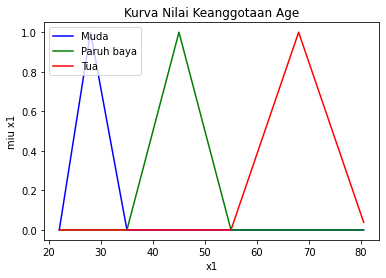

In [ ]:
# Pembentukan Himpunan Fuzzy Age [fungsi buat sendiri]
x_Age = np.arange(22, 81, 0.5) # Semesta Pembicaraan
amb_muda = [22, 28, 35]
amb_paruhbaya = [35, 45, 55]
amb_tua = [55, 68, 81]

miu_Age_muda = fungsi_segitiga(x_Age, amb_muda)
miu_Age_paruhbaya = fungsi_segitiga(x_Age, amb_paruhbaya)
miu_Age_tua = fungsi_segitiga(x_Age, amb_tua)

import matplotlib.pyplot as plt
plt.plot(x_Age, miu_Age_muda, label = "Muda", color='blue')
plt.plot(x_Age, miu_Age_paruhbaya, label = "Paruh baya", color='green')
plt.plot(x_Age, miu_Age_tua, label = "Tua", color='red')
plt.xlabel('x1')
plt.ylabel('miu x1')
plt.title('Kurva Nilai Keanggotaan Age')
plt.legend()
plt.show()

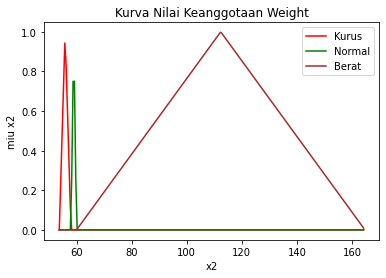

In [ ]:
# Pembentukan Himpunan Fuzzy Weight [fungsi buat sendiri]
x_Weight	= np.arange(53.75, 164.72, 0.5) # Semesta  Pembicaraan niali data kita
amb_kurus= [53.75, 55.87, 58]           #nilai interval dr teori 
amb_normal = [58, 59, 60]   
amb_berat = [60, 112.36, 164.72] 

miu_Weight_kurus = fungsi_segitiga(x_Weight, amb_kurus)
miu_Weight_normal = fungsi_segitiga(x_Weight, amb_normal)
miu_Weight_berat = fungsi_segitiga(x_Weight, amb_berat)

import matplotlib.pyplot as plt
plt.plot(x_Weight, miu_Weight_kurus, label = "Kurus", color='red')
plt.plot(x_Weight, miu_Weight_normal, label = "Normal", color='green')
plt.plot(x_Weight, miu_Weight_berat, label = "Berat", color='brown')

plt.xlabel('x2')
plt.ylabel('miu x2')
plt.title('Kurva Nilai Keanggotaan Weight')
plt.legend()
plt.show()

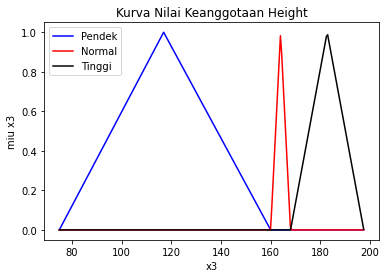

In [ ]:
# Pembentukan Himpunan Fuzzy Height[fungsi buat sendiri]
x_Height	= np.arange(74.93, 197.49, 0.5) # Semesta  Pembicaraan niali data kita
amb_pendek= [74.93, 116.93,160 ]           #nilai interval dr teori 
amb_normal = [160, 164, 168]   
amb_tinggi = [168, 182.75, 197.49 ] 

miu_Height_pendek = fungsi_segitiga(x_Height, amb_pendek)
miu_Height_normal = fungsi_segitiga(x_Height, amb_normal)
miu_Height_tinggi = fungsi_segitiga(x_Height, amb_tinggi)

import matplotlib.pyplot as plt
plt.plot(x_Height, miu_Height_pendek, label = "Pendek", color='blue')
plt.plot(x_Height, miu_Height_normal, label = "Normal", color='red')
plt.plot(x_Height, miu_Height_tinggi, label = "Tinggi", color='black')

plt.xlabel('x3')
plt.ylabel('miu x3')
plt.title('Kurva Nilai Keanggotaan Height')
plt.legend()
plt.show()

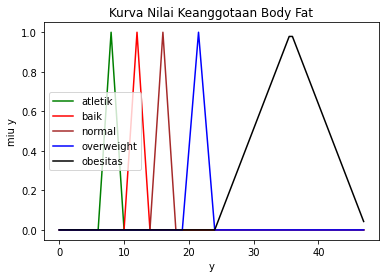

In [ ]:
# Pembentukan Himpunan Fuzzy Body Fat [fungsi buat sendiri]
x_BodyFat	= np.arange(0, 47.5, 0.5) #  Semesta Pembicaraan nilai data kita

amb_atletik = [6, 8, 10]
amb_baik = [10, 12, 14]
amb_normal = [14, 16, 18]
amb_overweight = [19, 21.5, 24]
amb_obesitas = [24, 35.75, 47.5]

miu_BodyFat_atletik = fungsi_segitiga(x_BodyFat, amb_atletik)
miu_BodyFat_baik = fungsi_segitiga(x_BodyFat, amb_baik)
miu_BodyFat_normal = fungsi_segitiga(x_BodyFat, amb_normal)
miu_BodyFat_overweight = fungsi_segitiga(x_BodyFat, amb_overweight)
miu_BodyFat_obesitas = fungsi_segitiga(x_BodyFat, amb_obesitas)

import matplotlib.pyplot as plt
plt.plot(x_BodyFat, miu_BodyFat_atletik, label = "atletik", color='green')
plt.plot(x_BodyFat, miu_BodyFat_baik, label = "baik", color='red')
plt.plot(x_BodyFat, miu_BodyFat_normal, label = "normal", color='brown')
plt.plot(x_BodyFat, miu_BodyFat_overweight, label = "overweight", color='blue')
plt.plot(x_BodyFat, miu_BodyFat_obesitas , label = "obesitas", color='black')
plt.xlabel('y')
plt.ylabel('miu y')
plt.title('Kurva Nilai Keanggotaan Body Fat')
plt.legend()
plt.show()

#Perhitungan Nilai Miu

In [ ]:
#X1 AGE
def fuzzyfikasi(x_array, amd_1, amd_2, amd_3, x, label_1, label_2, label_3):
    batas = (max(x_array)+min(x_array))
    awal = batas-68
    tengah = awal+20

    print(batas)
    print(awal)
    print(tengah)

    hasil=0
    if x <= awal:
        hasil=miu_fungsi_segitiga(x_array, amd_1, x)
        label_hasil = label_1
    elif awal <= x <= tengah: 
        hasil=miu_fungsi_segitiga(x_array, amd_2, x)
        label_hasil = label_2
    else:
        hasil=miu_fungsi_segitiga(x_array, amd_3, x)
        label_hasil = label_3
    return hasil, label_hasil

In [ ]:
#miu x1
x_Age= np.arange(22, 82, 0.5) # Semesta Pembicaraan
amb_muda = [22, 28, 35]
amb_paruhbaya = [35, 45, 55]
amb_tua = [55, 68, 81]

fuzzifikasi_Age=[]
miu_Age=[]
for i in df.Age:
    hasil=fuzzyfikasi(x_Age, amb_muda, amb_paruhbaya, amb_tua, i, "Muda", "Paruhbaya", "Tua")
    fuzz = hasil[1]
    m = hasil[0]
    fuzzifikasi_Age.append(fuzz)
    miu_Age.append(m)
    
len(fuzzifikasi_Age)

103.5
35.5
55.5
{22.0: 0.0, 22.5: 0.08333333333333333, 23.0: 0.16666666666666666, 23.5: 0.25, 24.0: 0.3333333333333333, 24.5: 0.4166666666666667, 25.0: 0.5, 25.5: 0.5833333333333334, 26.0: 0.6666666666666666, 26.5: 0.75, 27.0: 0.8333333333333334, 27.5: 0.9166666666666666, 28.0: 1.0, 28.5: 0.9285714285714286, 29.0: 0.8571428571428571, 29.5: 0.7857142857142857, 30.0: 0.7142857142857143, 30.5: 0.6428571428571429, 31.0: 0.5714285714285714, 31.5: 0.5, 32.0: 0.42857142857142855, 32.5: 0.35714285714285715, 33.0: 0.2857142857142857, 33.5: 0.21428571428571427, 34.0: 0.14285714285714285, 34.5: 0.07142857142857142, 35.0: 0.0, 35.5: 0.0, 36.0: 0.0, 36.5: 0.0, 37.0: 0.0, 37.5: 0.0, 38.0: 0.0, 38.5: 0.0, 39.0: 0.0, 39.5: 0.0, 40.0: 0.0, 40.5: 0.0, 41.0: 0.0, 41.5: 0.0, 42.0: 0.0, 42.5: 0.0, 43.0: 0.0, 43.5: 0.0, 44.0: 0.0, 44.5: 0.0, 45.0: 0.0, 45.5: 0.0, 46.0: 0.0, 46.5: 0.0, 47.0: 0.0, 47.5: 0.0, 48.0: 0.0, 48.5: 0.0, 49.0: 0.0, 49.5: 0.0, 50.0: 0.0, 50.5: 0.0, 51.0: 0.0, 51.5: 0.0, 52.0: 0.0, 52.

252

In [ ]:
#X2 (WEIGHT)
def fuzzyfikasi1(x_array, amd_1, amd_2, amd_3, x, label_1, label_2, label_3):
    batas   = (max(x_array)+min(x_array))/3
    awal    = batas-14.82
    tengah  = awal+18

    print(batas)
    print(awal)
    print(tengah)

    hasil=0
    if x <= awal:
        hasil=miu_fungsi_segitiga(x_array, amd_1, x)
        label_hasil = label_1
    elif awal< x <= tengah:
        hasil=miu_fungsi_segitiga(x_array, amd_2, x)
        label_hasil = label_2
    else:
        hasil=miu_fungsi_segitiga(x_array, amd_3, x)
        label_hasil = label_3
    return hasil, label_hasil

In [ ]:
#miu x2
x_Weight	= np.arange(53, 165, 0.5) # Semesta  Pembicaraan niali data kita
amb_kurus= [53.75, 55.87, 58]           #nilai interval dr teori 
amb_normal = [58, 59, 60]   
amb_berat = [60, 112.36, 164.72] 

fuzzifikasi_Weight=[]
miu_Weight=[]
for i in df.Weight:
    hasil=fuzzyfikasi1(x_Weight, amb_kurus, amb_normal, amb_berat, i, "Kurus", "Normal", "Berat")
    fuzz = hasil[1]
    m = hasil[0]
    fuzzifikasi_Weight.append(fuzz)
    miu_Weight.append(m)
    
len(fuzzifikasi_Weight)

72.5
57.68
75.68
{53.0: 0.0, 53.5: 0.0, 54.0: 0.0, 54.5: 0.0, 55.0: 0.0, 55.5: 0.0, 56.0: 0.0, 56.5: 0.0, 57.0: 0.0, 57.5: 0.0, 58.0: 0.0, 58.5: 0.5, 59.0: 1.0, 59.5: 0.5, 60.0: 0.0, 60.5: 0.0, 61.0: 0.0, 61.5: 0.0, 62.0: 0.0, 62.5: 0.0, 63.0: 0.0, 63.5: 0.0, 64.0: 0.0, 64.5: 0.0, 65.0: 0.0, 65.5: 0.0, 66.0: 0.0, 66.5: 0.0, 67.0: 0.0, 67.5: 0.0, 68.0: 0.0, 68.5: 0.0, 69.0: 0.0, 69.5: 0.0, 70.0: 0.0, 70.5: 0.0, 71.0: 0.0, 71.5: 0.0, 72.0: 0.0, 72.5: 0.0, 73.0: 0.0, 73.5: 0.0, 74.0: 0.0, 74.5: 0.0, 75.0: 0.0, 75.5: 0.0, 76.0: 0.0, 76.5: 0.0, 77.0: 0.0, 77.5: 0.0, 78.0: 0.0, 78.5: 0.0, 79.0: 0.0, 79.5: 0.0, 80.0: 0.0, 80.5: 0.0, 81.0: 0.0, 81.5: 0.0, 82.0: 0.0, 82.5: 0.0, 83.0: 0.0, 83.5: 0.0, 84.0: 0.0, 84.5: 0.0, 85.0: 0.0, 85.5: 0.0, 86.0: 0.0, 86.5: 0.0, 87.0: 0.0, 87.5: 0.0, 88.0: 0.0, 88.5: 0.0, 89.0: 0.0, 89.5: 0.0, 90.0: 0.0, 90.5: 0.0, 91.0: 0.0, 91.5: 0.0, 92.0: 0.0, 92.5: 0.0, 93.0: 0.0, 93.5: 0.0, 94.0: 0.0, 94.5: 0.0, 95.0: 0.0, 95.5: 0.0, 96.0: 0.0, 96.5: 0.0, 97.0: 0.0, 97.

252

In [ ]:
#X3 (HEIGHT)
def fuzzyfikasi2(x_array, amd_1, amd_2, amd_3, x, label_1, label_2, label_3):
    batas   = (max(x_array)+min(x_array))/2
    awal    = batas+23.79
    tengah  = awal+8

    print(batas)
    print(awal)
    print(tengah)

    hasil=0
    if x <= awal:
        hasil=miu_fungsi_segitiga(x_array, amd_1, x)
        label_hasil = label_1
    elif awal< x <= tengah:
        hasil=miu_fungsi_segitiga(x_array, amd_2, x)
        label_hasil = label_2
    else:
        hasil=miu_fungsi_segitiga(x_array, amd_3, x)
        label_hasil = label_3
    return hasil, label_hasil

In [ ]:
#Miu x3
x_Height	= np.arange(73, 197.49, 0.5) # Semesta  Pembicaraan niali data kita
amb_pendek= [74.93, 116.93,160 ]           #nilai interval dr teori 
amb_normal = [160, 164, 168]   
amb_tinggi = [168, 182.75, 197.49 ] 

fuzzifikasi_Height=[]
miu_Height=[]
for i in df.Height:
    hasil=fuzzyfikasi2(x_Height, amb_pendek, amb_normal, amb_tinggi, i, "Pendek", "Normal", "Tinggi")
    fuzz = hasil[1]
    m =hasil[0]
    fuzzifikasi_Height.append(fuzz)
    miu_Height.append(m)
len(fuzzifikasi_Height)

135.0
158.79
166.79
{73.0: 0.0, 73.5: 0.0, 74.0: 0.0, 74.5: 0.0, 75.0: 0.0, 75.5: 0.0, 76.0: 0.0, 76.5: 0.0, 77.0: 0.0, 77.5: 0.0, 78.0: 0.0, 78.5: 0.0, 79.0: 0.0, 79.5: 0.0, 80.0: 0.0, 80.5: 0.0, 81.0: 0.0, 81.5: 0.0, 82.0: 0.0, 82.5: 0.0, 83.0: 0.0, 83.5: 0.0, 84.0: 0.0, 84.5: 0.0, 85.0: 0.0, 85.5: 0.0, 86.0: 0.0, 86.5: 0.0, 87.0: 0.0, 87.5: 0.0, 88.0: 0.0, 88.5: 0.0, 89.0: 0.0, 89.5: 0.0, 90.0: 0.0, 90.5: 0.0, 91.0: 0.0, 91.5: 0.0, 92.0: 0.0, 92.5: 0.0, 93.0: 0.0, 93.5: 0.0, 94.0: 0.0, 94.5: 0.0, 95.0: 0.0, 95.5: 0.0, 96.0: 0.0, 96.5: 0.0, 97.0: 0.0, 97.5: 0.0, 98.0: 0.0, 98.5: 0.0, 99.0: 0.0, 99.5: 0.0, 100.0: 0.0, 100.5: 0.0, 101.0: 0.0, 101.5: 0.0, 102.0: 0.0, 102.5: 0.0, 103.0: 0.0, 103.5: 0.0, 104.0: 0.0, 104.5: 0.0, 105.0: 0.0, 105.5: 0.0, 106.0: 0.0, 106.5: 0.0, 107.0: 0.0, 107.5: 0.0, 108.0: 0.0, 108.5: 0.0, 109.0: 0.0, 109.5: 0.0, 110.0: 0.0, 110.5: 0.0, 111.0: 0.0, 111.5: 0.0, 112.0: 0.0, 112.5: 0.0, 113.0: 0.0, 113.5: 0.0, 114.0: 0.0, 114.5: 0.0, 115.0: 0.0, 115.5: 0.0, 1

252

In [ ]:
#Y (BODYFAT)
def fuzzyfikasi4(x_array, amd_1, amd_2, amd_3, amd_4, amd_5, x, label_1, label_2, label_3, label_4, label_5):
    batas = (max(x_array)+min(x_array))/2
    awal  = batas-16.75
    tengah = awal+4
    akhir1 = tengah+4
    akhir2 = akhir1+6

    print(batas)
    hasil=0
    if x <=awal:
        hasil=miu_fungsi_segitiga(x_array, amd_1, x)
        label_hasil = label_1
    elif batas < x <= tengah:
        hasil=miu_fungsi_segitiga(x_array, amd_2, x)
        label_hasil= label_2
    elif tengah < x <= akhir1:
        hasil=miu_fungsi_segitiga(x_array, amd_3, x)
        label_hasil= label_3
    elif akhir1 < x <= akhir2:
        hasil=miu_fungsi_segitiga(x_array, amd_4, x)
        label_hasil= label_4
    else:
        hasil=miu_fungsi_segitiga(x_array, amd_5, x)
        label_hasil = label_5
    return hasil, label_hasil

In [ ]:
#Miu y 
x_BodyFat	= np.arange(0, 47.5, 0.5) #  Semesta Pembicaraan nilai data kita
amb_atletik = [6, 8, 10]
amb_baik = [11, 12.5, 14]
amb_normal = [15, 16.5, 18]
amb_overweight = [19, 21.5, 24]
amb_obesitas = [25, 36.25, 47.5]

fuzzifikasi_BodyFat=[]
miu_BodyFat=[]
for i in df.BodyFat:
    hasil=fuzzyfikasi4(x_BodyFat, amb_atletik, amb_baik, amb_normal, amb_overweight, amb_obesitas, i, "atletik", "baik", "normal", "overweight", "obesitas")
    fuzz = hasil[1]
    m =hasil[0]
    fuzzifikasi_BodyFat.append(fuzz)
    miu_BodyFat.append(m)
len(fuzzifikasi_BodyFat)

23.5
{0.0: 0.0, 0.5: 0.0, 1.0: 0.0, 1.5: 0.0, 2.0: 0.0, 2.5: 0.0, 3.0: 0.0, 3.5: 0.0, 4.0: 0.0, 4.5: 0.0, 5.0: 0.0, 5.5: 0.0, 6.0: 0.0, 6.5: 0.0, 7.0: 0.0, 7.5: 0.0, 8.0: 0.0, 8.5: 0.0, 9.0: 0.0, 9.5: 0.0, 10.0: 0.0, 10.5: 0.0, 11.0: 0.0, 11.5: 0.0, 12.0: 0.0, 12.5: 0.0, 13.0: 0.0, 13.5: 0.0, 14.0: 0.0, 14.5: 0.0, 15.0: 0.0, 15.5: 0.3333333333333333, 16.0: 0.6666666666666666, 16.5: 1.0, 17.0: 0.6666666666666666, 17.5: 0.3333333333333333, 18.0: 0.0, 18.5: 0.0, 19.0: 0.0, 19.5: 0.0, 20.0: 0.0, 20.5: 0.0, 21.0: 0.0, 21.5: 0.0, 22.0: 0.0, 22.5: 0.0, 23.0: 0.0, 23.5: 0.0, 24.0: 0.0, 24.5: 0.0, 25.0: 0.0, 25.5: 0.0, 26.0: 0.0, 26.5: 0.0, 27.0: 0.0, 27.5: 0.0, 28.0: 0.0, 28.5: 0.0, 29.0: 0.0, 29.5: 0.0, 30.0: 0.0, 30.5: 0.0, 31.0: 0.0, 31.5: 0.0, 32.0: 0.0, 32.5: 0.0, 33.0: 0.0, 33.5: 0.0, 34.0: 0.0, 34.5: 0.0, 35.0: 0.0, 35.5: 0.0, 36.0: 0.0, 36.5: 0.0, 37.0: 0.0, 37.5: 0.0, 38.0: 0.0, 38.5: 0.0, 39.0: 0.0, 39.5: 0.0, 40.0: 0.0, 40.5: 0.0, 41.0: 0.0, 41.5: 0.0, 42.0: 0.0, 42.5: 0.0, 43.0: 0.

252

In [ ]:
df_fuzz = pd.DataFrame({"Age":df.Age,
                        "Weight":df.Weight,
                        "Height":df.Height,
                        "BodyFat":df.BodyFat,
                        "Age_fuzz": fuzzifikasi_Age,
                        "Weight_fuzz": fuzzifikasi_Weight,
                        "Height_fuzz": fuzzifikasi_Height,
                        "BodyFat_fuzz": fuzzifikasi_BodyFat,
                        "miu_Age":miu_Age,
                        "miu_Weight":miu_Weight,
                        "miu_Height":miu_Height,
                        "miu_BodyFat":miu_BodyFat,})
df_fuzz

Age    Weight   Height  BodyFat Age_fuzz Weight_fuzz Height_fuzz  \
0     23  69.96700  172.085     12.3     Muda      Normal      Tinggi   
1     22  78.58500  183.515      6.1     Muda       Berat      Tinggi   
2     22  69.85300  168.275     25.3     Muda      Normal      Tinggi   
3     26  83.80100  183.515     10.4     Muda       Berat      Tinggi   
4     24  83.57400  180.975     28.7     Muda       Berat      Tinggi   
..   ...       ...      ...      ...      ...         ...         ...   
247   70  60.89500  170.180     11.0      Tua      Normal      Tinggi   
248   72  91.17200  177.165     33.6      Tua       Berat      Tinggi   
249   72  84.70800  167.640     29.3      Tua       Berat      Tinggi   
250   72  86.52300  179.070     26.0      Tua       Berat      Tinggi   
251   70  94.12034  177.800     26.0      Tua       Berat      Tinggi   

    BodyFat_fuzz   miu_Age  miu_Weight  miu_Height  miu_BodyFat  
0         normal  0.166667    0.000000    0.271186     0.000000  
1        atletik  0.000000    0.343774    0.983039     0.000000  
2       obesitas  0.000000    0.000000    0.000000     0.000000  
3       obesitas  0.666667    0.439267    0.983039     0.000000  
4       obesitas  0.333333    0.439267    0.813559     0.266667  
..           ...       ...         ...         ...          ...  
247       normal  0.846154    0.000000    0.135593     0.000000  
248     obesitas  0.692308    0.592055    0.610169     0.711111  
249     obesitas  0.692308    0.458365    0.000000     0.355556  
250     obesitas  0.692308    0.496562    0.745763     0.088889  
251     obesitas  0.846154    0.649351    0.610169     0.088889  

[252 rows x 12 columns]

# Rule Generation

In [ ]:
df_fuzz['Rule'] = "Jika X1 " + df_fuzz['Age_fuzz'] + " X2 " + df_fuzz['Weight_fuzz'] + " X3 " + df_fuzz['Height_fuzz'] + " maka Y " + df_fuzz['BodyFat_fuzz']

In [ ]:
df_fuzz.to_excel('hasilRuleMBGD.xlsx') 

In [ ]:
df_fuzz['Rule'].value_counts()

Jika X1 Paruhbaya X2 Berat X3 Tinggi maka Y obesitas       56
Jika X1 Paruhbaya X2 Berat X3 Tinggi maka Y overweight     27
Jika X1 Tua X2 Berat X3 Tinggi maka Y obesitas             23
Jika X1 Muda X2 Berat X3 Tinggi maka Y obesitas            19
Jika X1 Paruhbaya X2 Normal X3 Tinggi maka Y normal        16
Jika X1 Paruhbaya X2 Normal X3 Tinggi maka Y obesitas      15
Jika X1 Muda X2 Berat X3 Tinggi maka Y overweight          12
Jika X1 Muda X2 Normal X3 Tinggi maka Y obesitas           10
Jika X1 Tua X2 Normal X3 Tinggi maka Y obesitas             9
Jika X1 Tua X2 Berat X3 Tinggi maka Y overweight            8
Jika X1 Paruhbaya X2 Normal X3 Tinggi maka Y overweight     7
Jika X1 Paruhbaya X2 Normal X3 Tinggi maka Y atletik        7
Jika X1 Muda X2 Berat X3 Tinggi maka Y normal               6
Jika X1 Paruhbaya X2 Berat X3 Tinggi maka Y normal          4
Jika X1 Tua X2 Normal X3 Tinggi maka Y overweight           4
Jika X1 Muda X2 Normal X3 Tinggi maka Y normal              4
Jika X1 

# TSK Prediction

In [ ]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

##Rule 1

In [ ]:
rule_1 = df_fuzz[df_fuzz['Rule']=="Jika X1 Paruhbaya X2 Berat X3 Tinggi maka Y obesitas"]
index=rule_1.index
data_rule_1=df_fuzz.iloc[index,:4]
X1=np.array(data_rule_1.iloc[::,:-1])
#Y=np.array(data_rule_1.iloc[::,:1])
Y1=np.array(data_rule_1.iloc[:,2])
data_rule_1.head()

Age   Weight   Height  BodyFat
33   41   99.110  180.340     21.3
34   41  112.151  186.690     32.3
36   40   91.739  177.800     24.2
37   50   89.244  173.355     28.4
38   46  164.722  183.515     35.2

In [ ]:
data_rule_1.to_csv('hasilrule1.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule1=pd.read_csv('hasilrule1.csv',sep=',')
df_rule1

Unnamed: 0  Age   Weight   Height  BodyFat
0           33   41   99.110  180.340     21.3
1           34   41  112.151  186.690     32.3
2           36   40   91.739  177.800     24.2
3           37   50   89.244  173.355     28.4
4           38   46  164.722  183.515     35.2
5           39   50   92.079  170.180     32.6
6           40   45  119.181  174.625     34.5
7           42   48   98.429  177.800     31.6
8           43   41   96.162  181.610     32.0
9           55   54   89.811  182.880     22.6
10          58   54   91.852  179.705     31.5
11          62   54   87.657  178.435     30.7
12          65   55   83.234  171.450     30.0
13          88   46   80.172  184.150      8.3
14          93   46   87.316  182.245     24.9
15          94   47   83.574  189.230      9.0
16          96   38   85.615  186.055      9.6
17          99   47   89.358  182.880     22.2
18         100   49   90.038  186.690     21.2
19         103   49   89.244  187.325     22.3
20         104   43   80.286  175.895     25.4
21         109   40   76.430  175.895     21.4
22         111   43   83.121  177.800     28.0
23         112   47   80.853  177.800     22.1
24         114   48   79.492  182.245     26.7
25         118   40   86.636  187.960     25.8
26         120   52   93.667  189.230     27.9
27         121   44   84.028  181.610     25.3
28         126   42   80.513  174.625     27.2
29         128   40   87.203  186.055     20.8
30         131   40   77.678  179.070     22.7
31         132   47   89.358  186.055     23.6
32         134   41   76.317  176.530     24.4
33         135   44   84.368  177.165     27.1
34         137   43   85.162  187.960     29.4
35         138   40   76.317  180.975     22.4
36         140   40   80.172  180.340     24.9
37         142   52   75.750  172.085     23.3
38         174   36  102.852  182.245     25.3
39         177   37  109.429  181.610     29.9
40         178   38   84.935  175.895     22.5
41         180   39   99.450  188.595     26.6
42         185   40   75.977  181.610      8.6
43         186   41  105.574  188.595     23.6
44         189   41   83.915  173.355     24.4
45         191   42  110.790  193.040     38.1
46         193   42  101.945  189.865     24.7
47         195   42   81.647  173.355     25.5
48         199   43   77.451  171.450     23.6
49         202   43   90.945  181.610     28.7
50         204   44  101.151  177.165     34.8
51         207   47   88.450  184.150     32.8
52         211   49   98.089  189.230     27.2
53         218   52   90.378  182.245     24.5
54         221   54  104.326  183.515     26.0
55         227   55   90.038  188.595     25.2

In [ ]:
df_rule1=df_rule1.drop(columns=['Unnamed: 0'])      #diilangin kolom
df_rule1

Age   Weight   Height  BodyFat
0    41   99.110  180.340     21.3
1    41  112.151  186.690     32.3
2    40   91.739  177.800     24.2
3    50   89.244  173.355     28.4
4    46  164.722  183.515     35.2
5    50   92.079  170.180     32.6
6    45  119.181  174.625     34.5
7    48   98.429  177.800     31.6
8    41   96.162  181.610     32.0
9    54   89.811  182.880     22.6
10   54   91.852  179.705     31.5
11   54   87.657  178.435     30.7
12   55   83.234  171.450     30.0
13   46   80.172  184.150      8.3
14   46   87.316  182.245     24.9
15   47   83.574  189.230      9.0
16   38   85.615  186.055      9.6
17   47   89.358  182.880     22.2
18   49   90.038  186.690     21.2
19   49   89.244  187.325     22.3
20   43   80.286  175.895     25.4
21   40   76.430  175.895     21.4
22   43   83.121  177.800     28.0
23   47   80.853  177.800     22.1
24   48   79.492  182.245     26.7
25   40   86.636  187.960     25.8
26   52   93.667  189.230     27.9
27   44   84.028  181.610     25.3
28   42   80.513  174.625     27.2
29   40   87.203  186.055     20.8
30   40   77.678  179.070     22.7
31   47   89.358  186.055     23.6
32   41   76.317  176.530     24.4
33   44   84.368  177.165     27.1
34   43   85.162  187.960     29.4
35   40   76.317  180.975     22.4
36   40   80.172  180.340     24.9
37   52   75.750  172.085     23.3
38   36  102.852  182.245     25.3
39   37  109.429  181.610     29.9
40   38   84.935  175.895     22.5
41   39   99.450  188.595     26.6
42   40   75.977  181.610      8.6
43   41  105.574  188.595     23.6
44   41   83.915  173.355     24.4
45   42  110.790  193.040     38.1
46   42  101.945  189.865     24.7
47   42   81.647  173.355     25.5
48   43   77.451  171.450     23.6
49   43   90.945  181.610     28.7
50   44  101.151  177.165     34.8
51   47   88.450  184.150     32.8
52   49   98.089  189.230     27.2
53   52   90.378  182.245     24.5
54   54  104.326  183.515     26.0
55   55   90.038  188.595     25.2

In [ ]:
from sklearn import preprocessing
sx1 = preprocessing.MinMaxScaler()
sy1 = preprocessing.MinMaxScaler()

scaled_X1 = sx1.fit_transform(data_rule_1.drop('BodyFat',axis='columns'))
scaled_y1 = sy1.fit_transform(data_rule_1['BodyFat'].values.reshape(rule_1.shape[0],1))

scaled_X1

array([[0.26315789, 0.26255451, 0.44444444],
       [0.26315789, 0.40912871, 0.72222222],
       [0.21052632, 0.17970822, 0.33333333],
       [0.73684211, 0.15166569, 0.13888889],
       [0.52631579, 1.        , 0.58333333],
       [0.73684211, 0.18352965, 0.        ],
       [0.47368421, 0.48814234, 0.19444444],
       [0.63157895, 0.25490042, 0.33333333],
       [0.26315789, 0.22942049, 0.5       ],
       [0.94736842, 0.15803848, 0.55555556],
       [0.94736842, 0.18097829, 0.41666667],
       [0.94736842, 0.13382862, 0.36111111],
       [1.        , 0.08411635, 0.05555556],
       [0.52631579, 0.04970103, 0.61111111],
       [0.52631579, 0.12999595, 0.52777778],
       [0.57894737, 0.08793778, 0.83333333],
       [0.10526316, 0.11087758, 0.69444444],
       [0.57894737, 0.15294699, 0.55555556],
       [0.68421053, 0.16058985, 0.72222222],
       [0.68421053, 0.15166569, 0.75      ],
       [0.36842105, 0.05098233, 0.25      ],
       [0.21052632, 0.00764285, 0.25      ],
       [0.

In [ ]:
scaled_y1_reshape=scaled_y1.reshape(scaled_y1.shape[0],)
scaled_y1_reshape

array([0.43624161, 0.80536913, 0.53355705, 0.67449664, 0.90268456,
       0.81543624, 0.87919463, 0.78187919, 0.79530201, 0.47986577,
       0.77852349, 0.75167785, 0.72818792, 0.        , 0.55704698,
       0.02348993, 0.04362416, 0.46644295, 0.43288591, 0.46979866,
       0.5738255 , 0.43959732, 0.66107383, 0.46308725, 0.61744966,
       0.58724832, 0.65771812, 0.5704698 , 0.63422819, 0.41946309,
       0.48322148, 0.51342282, 0.54026846, 0.63087248, 0.70805369,
       0.47315436, 0.55704698, 0.5033557 , 0.5704698 , 0.72483221,
       0.47651007, 0.61409396, 0.01006711, 0.51342282, 0.54026846,
       1.        , 0.55033557, 0.57718121, 0.51342282, 0.68456376,
       0.88926174, 0.82214765, 0.63422819, 0.54362416, 0.59395973,
       0.56711409])

In [ ]:
def mini_batch_gradient_descent_rule1(X1, y1, iterasi, batch_size = 5, learning_rate = 0.001):

    jumlah_variabel_rule1 = X1.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule1 = np.ones(shape=(jumlah_variabel_rule1))       # b1, b2, ... b(jumlah variabel)
    b0_rule1 = 0                                         # b0 atau bias
    n = X1.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule1_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule1_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule1_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule1 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X1_smntr = X1[random_indices]
        y1_smntr = y1[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule1 = X1_smntr[j:j+batch_size]
            yj_rule1 = y1_smntr[j:j+batch_size]
            
            y1_pred = np.dot(bpoly_rule1, Xj_rule1.T) + b0_rule1           # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule1_grad = -(2/len(Xj_rule1))*(Xj_rule1.T.dot(yj_rule1-y1_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule1_grad = -(2/len(Xj_rule1))*np.sum(yj_rule1-y1_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule1 = bpoly_rule1 - learning_rate * bpoly_rule1_grad        # Memperbaharui bpoly(bobot) setiap iterasi
            b0_rule1 = b0_rule1 - learning_rate * b0_rule1_grad                 # Memperbaharui bpoly(bobot) setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule1 in range(jumlah_variabel_rule1):
                bp_rule1=bpoly_rule1[jv_rule1]
                bp.append(bp_rule1)
            b_rule1=[b0_rule1]+bp
        
            cost_rule1 = np.mean(np.square(yj_rule1-y1_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule1_list.append(cost_rule1)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule1_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule1_list.append(b_rule1)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule1, b0_rule1, cost_rule1, b_rule1_list, cost_rule1_list, iterasi_rule1_list  # Output

In [ ]:
import time
mulai_rule1 = time.time()
mb_bpoly_rule1, mb_b0_rule1, mb_cost_rule1, mb_b_rule1_list, mb_cost_rule1_list, mb_iterasi_rule1_list=mini_batch_gradient_descent_rule1 (scaled_X1, 
                                                                                                                                        scaled_y1_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 5, 
                                                                                                                                        learning_rate = 0.001)
selesai_rule1 = time.time()
waktu_komputasi_rule1 = (selesai_rule1 - mulai_rule1)
print("Waktu Komputasi Rule 1: ",waktu_komputasi_rule1)

Waktu Komputasi Rule 1:  5.174825191497803


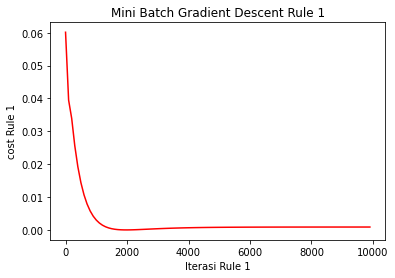

In [ ]:
plt.xlabel("Iterasi Rule 1")
plt.ylabel("cost Rule 1")
plt.title("Mini Batch Gradient Descent Rule 1")
plt.plot(mb_iterasi_rule1_list,mb_cost_rule1_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule1

0.0008781659643604036

In [ ]:
mb_b0_rule1

0.5081032473800257

In [ ]:
mb_bpoly_rule1 #hasil untuk x1 dan x2

array([ 0.13316122,  0.74582711, -0.25629965])

In [ ]:
data_rule_1

Age   Weight   Height  BodyFat
33    41   99.110  180.340     21.3
34    41  112.151  186.690     32.3
36    40   91.739  177.800     24.2
37    50   89.244  173.355     28.4
38    46  164.722  183.515     35.2
39    50   92.079  170.180     32.6
40    45  119.181  174.625     34.5
42    48   98.429  177.800     31.6
43    41   96.162  181.610     32.0
55    54   89.811  182.880     22.6
58    54   91.852  179.705     31.5
62    54   87.657  178.435     30.7
65    55   83.234  171.450     30.0
88    46   80.172  184.150      8.3
93    46   87.316  182.245     24.9
94    47   83.574  189.230      9.0
96    38   85.615  186.055      9.6
99    47   89.358  182.880     22.2
100   49   90.038  186.690     21.2
103   49   89.244  187.325     22.3
104   43   80.286  175.895     25.4
109   40   76.430  175.895     21.4
111   43   83.121  177.800     28.0
112   47   80.853  177.800     22.1
114   48   79.492  182.245     26.7
118   40   86.636  187.960     25.8
120   52   93.667  189.230     27.9
121   44   84.028  181.610     25.3
126   42   80.513  174.625     27.2
128   40   87.203  186.055     20.8
131   40   77.678  179.070     22.7
132   47   89.358  186.055     23.6
134   41   76.317  176.530     24.4
135   44   84.368  177.165     27.1
137   43   85.162  187.960     29.4
138   40   76.317  180.975     22.4
140   40   80.172  180.340     24.9
142   52   75.750  172.085     23.3
174   36  102.852  182.245     25.3
177   37  109.429  181.610     29.9
178   38   84.935  175.895     22.5
180   39   99.450  188.595     26.6
185   40   75.977  181.610      8.6
186   41  105.574  188.595     23.6
189   41   83.915  173.355     24.4
191   42  110.790  193.040     38.1
193   42  101.945  189.865     24.7
195   42   81.647  173.355     25.5
199   43   77.451  171.450     23.6
202   43   90.945  181.610     28.7
204   44  101.151  177.165     34.8
207   47   88.450  184.150     32.8
211   49   98.089  189.230     27.2
218   52   90.378  182.245     24.5
221   54  104.326  183.515     26.0
227   55   90.038  188.595     25.2

In [ ]:
X1=np.array(data_rule_1.iloc[::,:-1])
X1

array([[ 41.   ,  99.11 , 180.34 ],
       [ 41.   , 112.151, 186.69 ],
       [ 40.   ,  91.739, 177.8  ],
       [ 50.   ,  89.244, 173.355],
       [ 46.   , 164.722, 183.515],
       [ 50.   ,  92.079, 170.18 ],
       [ 45.   , 119.181, 174.625],
       [ 48.   ,  98.429, 177.8  ],
       [ 41.   ,  96.162, 181.61 ],
       [ 54.   ,  89.811, 182.88 ],
       [ 54.   ,  91.852, 179.705],
       [ 54.   ,  87.657, 178.435],
       [ 55.   ,  83.234, 171.45 ],
       [ 46.   ,  80.172, 184.15 ],
       [ 46.   ,  87.316, 182.245],
       [ 47.   ,  83.574, 189.23 ],
       [ 38.   ,  85.615, 186.055],
       [ 47.   ,  89.358, 182.88 ],
       [ 49.   ,  90.038, 186.69 ],
       [ 49.   ,  89.244, 187.325],
       [ 43.   ,  80.286, 175.895],
       [ 40.   ,  76.43 , 175.895],
       [ 43.   ,  83.121, 177.8  ],
       [ 47.   ,  80.853, 177.8  ],
       [ 48.   ,  79.492, 182.245],
       [ 40.   ,  86.636, 187.96 ],
       [ 52.   ,  93.667, 189.23 ],
       [ 44.   ,  84.028, 18

In [ ]:
Y1=np.array(data_rule_1.iloc[:,3])  #mengambil angka dari kolom
Y1

array([21.3, 32.3, 24.2, 28.4, 35.2, 32.6, 34.5, 31.6, 32. , 22.6, 31.5,
       30.7, 30. ,  8.3, 24.9,  9. ,  9.6, 22.2, 21.2, 22.3, 25.4, 21.4,
       28. , 22.1, 26.7, 25.8, 27.9, 25.3, 27.2, 20.8, 22.7, 23.6, 24.4,
       27.1, 29.4, 22.4, 24.9, 23.3, 25.3, 29.9, 22.5, 26.6,  8.6, 23.6,
       24.4, 38.1, 24.7, 25.5, 23.6, 28.7, 34.8, 32.8, 27.2, 24.5, 26. ,
       25.2])

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X1_poly = poly_reg.fit_transform(X1)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X1_poly, Y1) 
# Proses Training Model
poly_reg.fit(X1, Y1) 

# Memprediksi hasil dengan regresi polynomial
# Memprediksi hasil dengan regresi polynomial
y1_pred=lin_reg_2.predict(poly_reg.fit_transform(X1))
y1_pred

data_rule_1['pred'] = y1_pred
data_rule_1

Age   Weight   Height  BodyFat       pred
33    41   99.110  180.340     21.3  28.769464
34    41  112.151  186.690     32.3  32.673433
36    40   91.739  177.800     24.2  26.437480
37    50   89.244  173.355     28.4  30.483289
38    46  164.722  183.515     35.2  35.131833
39    50   92.079  170.180     32.6  32.282619
40    45  119.181  174.625     34.5  33.355729
42    48   98.429  177.800     31.6  31.547591
43    41   96.162  181.610     32.0  27.407149
55    54   89.811  182.880     22.6  25.236224
58    54   91.852  179.705     31.5  27.879996
62    54   87.657  178.435     30.7  26.706141
65    55   83.234  171.450     30.0  28.712695
88    46   80.172  184.150      8.3  19.584879
93    46   87.316  182.245     24.9  24.985881
94    47   83.574  189.230      9.0  18.103299
96    38   85.615  186.055      9.6  18.331349
99    47   89.358  182.880     22.2  25.836697
100   49   90.038  186.690     21.2  24.175265
103   49   89.244  187.325     22.3  23.302358
104   43   80.286  175.895     25.4  24.653907
109   40   76.430  175.895     21.4  21.494498
111   43   83.121  177.800     28.0  24.689818
112   47   80.853  177.800     22.1  24.711653
114   48   79.492  182.245     26.7  20.804422
118   40   86.636  187.960     25.8  19.035619
120   52   93.667  189.230     27.9  24.586337
121   44   84.028  181.610     25.3  23.162497
126   42   80.513  174.625     27.2  25.087685
128   40   87.203  186.055     20.8  20.525678
131   40   77.678  179.070     22.7  19.809461
132   47   89.358  186.055     23.6  24.083801
134   41   76.317  176.530     24.4  21.542599
135   44   84.368  177.165     27.1  25.952225
137   43   85.162  187.960     29.4  19.376685
138   40   76.317  180.975     22.4  17.628521
140   40   80.172  180.340     24.9  20.206069
142   52   75.750  172.085     23.3  26.449268
174   36  102.852  182.245     25.3  25.959028
177   37  109.429  181.610     29.9  28.663800
178   38   84.935  175.895     22.5  23.511261
180   39   99.450  188.595     26.6  25.658331
185   40   75.977  181.610      8.6  16.924339
186   41  105.574  188.595     23.6  29.888001
189   41   83.915  173.355     24.4  26.415931
191   42  110.790  193.040     38.1  32.472396
193   42  101.945  189.865     24.7  28.285371
195   42   81.647  173.355     25.5  26.229089
199   43   77.451  171.450     23.6  26.450009
202   43   90.945  181.610     28.7  26.181598
204   44  101.151  177.165     34.8  31.326742
207   47   88.450  184.150     32.8  24.652102
211   49   98.089  189.230     27.2  27.762241
218   52   90.378  182.245     24.5  26.450093
221   54  104.326  183.515     26.0  31.752710
227   55   90.038  188.595     25.2  21.472847

##Rule 2


In [ ]:
rule_2 = df_fuzz[df_fuzz['Rule']=="Jika X1 Paruhbaya X2 Berat X3 Tinggi maka Y overweight"]
index=rule_2.index
data_rule_2=df_fuzz.iloc[index,:4]
data_rule_2

Age   Weight   Height  BodyFat
90    46   80.286  177.800     20.5
91    44   81.533  176.530     18.2
95    53  101.831  197.485     17.4
101   48   78.812  182.880     20.4
102   41   78.358  180.975     20.1
106   43   90.832  186.690     19.3
107   52   92.193  188.595     18.3
108   43   87.997  191.770     17.3
110   43   77.451  173.990     19.7
116   48   80.399  184.785     20.1
119   44   85.049  183.515     18.1
125   46   75.750  170.180     17.5
130   49   77.904  181.610     18.1
139   49   96.502  190.500     20.4
141   40   78.585  176.530     18.3
173   36   79.946  181.610     16.9
179   39  106.481  189.230     16.9
184   40   77.337  188.595     17.5
187   41   95.481  182.880     20.4
188   41   91.739  184.150     20.5
192   42   87.770  179.070     15.9
197   42   76.203  181.610     17.7
205   44   94.687  185.420     16.6
212   49   76.317  182.245     19.5
213   50   88.337  179.705     18.7
214   50   78.358  185.420     19.5
226   55   76.884  173.355     14.8

In [ ]:
data_rule_2.to_csv('hasilrule2.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule2=pd.read_csv('hasilrule2.csv',sep=',')
df_rule2

Unnamed: 0  Age   Weight   Height  BodyFat
0           90   46   80.286  177.800     20.5
1           91   44   81.533  176.530     18.2
2           95   53  101.831  197.485     17.4
3          101   48   78.812  182.880     20.4
4          102   41   78.358  180.975     20.1
5          106   43   90.832  186.690     19.3
6          107   52   92.193  188.595     18.3
7          108   43   87.997  191.770     17.3
8          110   43   77.451  173.990     19.7
9          116   48   80.399  184.785     20.1
10         119   44   85.049  183.515     18.1
11         125   46   75.750  170.180     17.5
12         130   49   77.904  181.610     18.1
13         139   49   96.502  190.500     20.4
14         141   40   78.585  176.530     18.3
15         173   36   79.946  181.610     16.9
16         179   39  106.481  189.230     16.9
17         184   40   77.337  188.595     17.5
18         187   41   95.481  182.880     20.4
19         188   41   91.739  184.150     20.5
20         192   42   87.770  179.070     15.9
21         197   42   76.203  181.610     17.7
22         205   44   94.687  185.420     16.6
23         212   49   76.317  182.245     19.5
24         213   50   88.337  179.705     18.7
25         214   50   78.358  185.420     19.5
26         226   55   76.884  173.355     14.8

In [ ]:
df_rule2=df_rule2.drop(columns=['Unnamed: 0'])
df_rule2

Age   Weight   Height  BodyFat
0    46   80.286  177.800     20.5
1    44   81.533  176.530     18.2
2    53  101.831  197.485     17.4
3    48   78.812  182.880     20.4
4    41   78.358  180.975     20.1
5    43   90.832  186.690     19.3
6    52   92.193  188.595     18.3
7    43   87.997  191.770     17.3
8    43   77.451  173.990     19.7
9    48   80.399  184.785     20.1
10   44   85.049  183.515     18.1
11   46   75.750  170.180     17.5
12   49   77.904  181.610     18.1
13   49   96.502  190.500     20.4
14   40   78.585  176.530     18.3
15   36   79.946  181.610     16.9
16   39  106.481  189.230     16.9
17   40   77.337  188.595     17.5
18   41   95.481  182.880     20.4
19   41   91.739  184.150     20.5
20   42   87.770  179.070     15.9
21   42   76.203  181.610     17.7
22   44   94.687  185.420     16.6
23   49   76.317  182.245     19.5
24   50   88.337  179.705     18.7
25   50   78.358  185.420     19.5
26   55   76.884  173.355     14.8

In [ ]:
from sklearn import preprocessing
sx2 = preprocessing.MinMaxScaler()
sy2 = preprocessing.MinMaxScaler()

scaled_X2 = sx2.fit_transform(data_rule_2.drop('BodyFat',axis='columns'))
scaled_y2 = sy2.fit_transform(data_rule_2['BodyFat'].values.reshape(rule_2.shape[0],1))

scaled_X2

array([[0.52631579, 0.1476034 , 0.27906977],
       [0.42105263, 0.18818132, 0.23255814],
       [0.89473684, 0.84868699, 1.        ],
       [0.63157895, 0.0996388 , 0.46511628],
       [0.26315789, 0.08486545, 0.39534884],
       [0.36842105, 0.49077479, 0.60465116],
       [0.84210526, 0.53506231, 0.6744186 ],
       [0.36842105, 0.39852266, 0.79069767],
       [0.36842105, 0.05535127, 0.13953488],
       [0.63157895, 0.15128047, 0.53488372],
       [0.42105263, 0.30259347, 0.48837209],
       [0.52631579, 0.        , 0.        ],
       [0.68421053, 0.07009209, 0.41860465],
       [0.68421053, 0.67527903, 0.74418605],
       [0.21052632, 0.09225212, 0.23255814],
       [0.        , 0.13653965, 0.41860465],
       [0.15789474, 1.        , 0.69767442],
       [0.21052632, 0.05164166, 0.6744186 ],
       [0.26315789, 0.64205525, 0.46511628],
       [0.26315789, 0.52028896, 0.51162791],
       [0.31578947, 0.39113599, 0.3255814 ],
       [0.31578947, 0.01474082, 0.41860465],
       [0.

In [ ]:
scaled_y2_reshape=scaled_y2.reshape(scaled_y2.shape[0],)
scaled_y2_reshape

array([1.        , 0.59649123, 0.45614035, 0.98245614, 0.92982456,
       0.78947368, 0.61403509, 0.43859649, 0.85964912, 0.92982456,
       0.57894737, 0.47368421, 0.57894737, 0.98245614, 0.61403509,
       0.36842105, 0.36842105, 0.47368421, 0.98245614, 1.        ,
       0.19298246, 0.50877193, 0.31578947, 0.8245614 , 0.68421053,
       0.8245614 , 0.        ])

In [ ]:
def mini_batch_gradient_descent_rule2(X2, y2, iterasi, batch_size = 5, learning_rate = 0.001):

    jumlah_variabel_rule2 = X2.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule2 = np.ones(shape=(jumlah_variabel_rule2))       # b1, b2, ... b(jumlah variabel)
    b0_rule2 = 0                                         # b0 atau bias
    n = X2.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule2_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule2_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule2_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule2 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X2_smntr = X2[random_indices]
        y2_smntr = y2[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule2 = X2_smntr[j:j+batch_size]
            yj_rule2 = y2_smntr[j:j+batch_size]
            
            y2_pred = np.dot(bpoly_rule2, Xj_rule2.T) + b0_rule2           # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule2_grad = -(2/len(Xj_rule2))*(Xj_rule2.T.dot(yj_rule2-y2_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule2_grad = -(2/len(Xj_rule2))*np.sum(yj_rule2-y2_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule2 = bpoly_rule2 - learning_rate * bpoly_rule2_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule2 = b0_rule2 - learning_rate * b0_rule2_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule2 in range(jumlah_variabel_rule2):
                bp_rule2=bpoly_rule2[jv_rule2]
                bp.append(bp_rule2)
            b_rule2=[b0_rule2]+bp
        
            cost_rule2 = np.mean(np.square(yj_rule2-y2_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule2_list.append(cost_rule2)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule2_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule2_list.append(b_rule2)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule2, b0_rule2, cost_rule2, b_rule2_list, cost_rule2_list, iterasi_rule2_list  # Output

In [ ]:
import time
mulai_rule2 = time.time()
mb_bpoly_rule2, mb_b0_rule2, mb_cost_rule2, mb_b_rule2_list, mb_cost_rule2_list, mb_iterasi_rule2_list=mini_batch_gradient_descent_rule2 (scaled_X2, 
                                                                                                                                        scaled_y2_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 5, 
                                                                                                                                        learning_rate = 0.001)
selesai_rule2 = time.time()
waktu_komputasi_rule2 = (selesai_rule2 - mulai_rule2)
print("Waktu Komputasi Rule 2: ",waktu_komputasi_rule2)

Waktu Komputasi Rule 2:  7.4717185497283936


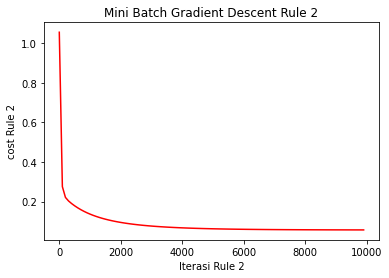

In [ ]:
plt.xlabel("Iterasi Rule 2")
plt.ylabel("cost Rule 2")
plt.title("Mini Batch Gradient Descent Rule 2")
plt.plot(mb_iterasi_rule2_list,mb_cost_rule2_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule2

0.05655168170664444

In [ ]:
mb_b0_rule2

0.6449997840683147

In [ ]:
mb_bpoly_rule2 #hasil untuk x1 dan x2

array([-0.09159184, -0.10695912,  0.19564503])

In [ ]:
data_rule_2

Age   Weight   Height  BodyFat
90    46   80.286  177.800     20.5
91    44   81.533  176.530     18.2
95    53  101.831  197.485     17.4
101   48   78.812  182.880     20.4
102   41   78.358  180.975     20.1
106   43   90.832  186.690     19.3
107   52   92.193  188.595     18.3
108   43   87.997  191.770     17.3
110   43   77.451  173.990     19.7
116   48   80.399  184.785     20.1
119   44   85.049  183.515     18.1
125   46   75.750  170.180     17.5
130   49   77.904  181.610     18.1
139   49   96.502  190.500     20.4
141   40   78.585  176.530     18.3
173   36   79.946  181.610     16.9
179   39  106.481  189.230     16.9
184   40   77.337  188.595     17.5
187   41   95.481  182.880     20.4
188   41   91.739  184.150     20.5
192   42   87.770  179.070     15.9
197   42   76.203  181.610     17.7
205   44   94.687  185.420     16.6
212   49   76.317  182.245     19.5
213   50   88.337  179.705     18.7
214   50   78.358  185.420     19.5
226   55   76.884  173.355     14.8

In [ ]:
X2=np.array(data_rule_2.iloc[::,:-1])
X2

array([[ 46.   ,  80.286, 177.8  ],
       [ 44.   ,  81.533, 176.53 ],
       [ 53.   , 101.831, 197.485],
       [ 48.   ,  78.812, 182.88 ],
       [ 41.   ,  78.358, 180.975],
       [ 43.   ,  90.832, 186.69 ],
       [ 52.   ,  92.193, 188.595],
       [ 43.   ,  87.997, 191.77 ],
       [ 43.   ,  77.451, 173.99 ],
       [ 48.   ,  80.399, 184.785],
       [ 44.   ,  85.049, 183.515],
       [ 46.   ,  75.75 , 170.18 ],
       [ 49.   ,  77.904, 181.61 ],
       [ 49.   ,  96.502, 190.5  ],
       [ 40.   ,  78.585, 176.53 ],
       [ 36.   ,  79.946, 181.61 ],
       [ 39.   , 106.481, 189.23 ],
       [ 40.   ,  77.337, 188.595],
       [ 41.   ,  95.481, 182.88 ],
       [ 41.   ,  91.739, 184.15 ],
       [ 42.   ,  87.77 , 179.07 ],
       [ 42.   ,  76.203, 181.61 ],
       [ 44.   ,  94.687, 185.42 ],
       [ 49.   ,  76.317, 182.245],
       [ 50.   ,  88.337, 179.705],
       [ 50.   ,  78.358, 185.42 ],
       [ 55.   ,  76.884, 173.355]])

In [ ]:
Y2=np.array(data_rule_2.iloc[:,3])
Y2

array([20.5, 18.2, 17.4, 20.4, 20.1, 19.3, 18.3, 17.3, 19.7, 20.1, 18.1,
       17.5, 18.1, 20.4, 18.3, 16.9, 16.9, 17.5, 20.4, 20.5, 15.9, 17.7,
       16.6, 19.5, 18.7, 19.5, 14.8])

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X2_poly = poly_reg.fit_transform(X2)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X2_poly, Y2) 
# Proses Training Model
poly_reg.fit(X2, Y2) 

# Memprediksi hasil dengan regresi polynomial
# Memprediksi hasil dengan regresi polynomial
y2_pred=lin_reg_2.predict(poly_reg.fit_transform(X2))
y2_pred

data_rule_2['pred'] = y2_pred
data_rule_2

Age   Weight   Height  BodyFat       pred
90    46   80.286  177.800     20.5  19.122677
91    44   81.533  176.530     18.2  18.865174
95    53  101.831  197.485     17.4  17.678829
101   48   78.812  182.880     20.4  19.533913
102   41   78.358  180.975     20.1  18.951083
106   43   90.832  186.690     19.3  18.865869
107   52   92.193  188.595     18.3  18.659100
108   43   87.997  191.770     17.3  17.824514
110   43   77.451  173.990     19.7  18.647663
116   48   80.399  184.785     20.1  19.489252
119   44   85.049  183.515     18.1  19.292099
125   46   75.750  170.180     17.5  17.408441
130   49   77.904  181.610     18.1  19.392343
139   49   96.502  190.500     20.4  18.966328
141   40   78.585  176.530     18.3  18.592091
173   36   79.946  181.610     16.9  16.951233
179   39  106.481  189.230     16.9  17.273492
184   40   77.337  188.595     17.5  17.158240
187   41   95.481  182.880     20.4  18.420671
188   41   91.739  184.150     20.5  18.548692
192   42   87.770  179.070     15.9  18.693602
197   42   76.203  181.610     17.7  19.185126
205   44   94.687  185.420     16.6  19.019292
212   49   76.317  182.245     19.5  19.484267
213   50   88.337  179.705     18.7  18.218368
214   50   78.358  185.420     19.5  19.312120
226   55   76.884  173.355     14.8  15.045518

##Rule 3

In [ ]:
rule_3 = df_fuzz[df_fuzz['Rule']=="Jika X1 Tua X2 Berat X3 Tinggi maka Y obesitas"]
index=rule_3.index
data_rule_3=df_fuzz.iloc[index,:4]
data_rule_3

Age     Weight   Height  BodyFat
57    62   91.28500  176.530     28.0
59    61   81.53300  167.005     24.6
60    62   97.97600  186.055     26.1
61    56   81.08000  173.990     29.8
63    61   80.73900  170.180     25.8
64    57   93.21300  177.800     32.3
70    62   75.97700  181.610     24.3
77    69   80.62600  173.990     22.2
83    70   77.45100  177.800     27.0
84    72   76.20300  175.895     27.0
85    67   75.75000  171.450     26.6
236   62   86.86300  183.515     24.8
237   63   99.40500  176.530     27.3
239   65   86.06900  167.005     29.9
241   65  101.83100  173.355     35.0
242   66  106.25400  182.880     30.4
243   67  103.30600  184.785     32.6
244   67   90.49200  173.990     29.0
246   69   97.74900  179.070     30.2
248   72   91.17200  177.165     33.6
249   72   84.70800  167.640     29.3
250   72   86.52300  179.070     26.0
251   70   94.12034  177.800     26.0

In [ ]:
data_rule_3.to_csv('hasilrule3.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule3=pd.read_csv('hasilrule3.csv',sep=',')
df_rule3

Unnamed: 0  Age     Weight   Height  BodyFat
0           57   62   91.28500  176.530     28.0
1           59   61   81.53300  167.005     24.6
2           60   62   97.97600  186.055     26.1
3           61   56   81.08000  173.990     29.8
4           63   61   80.73900  170.180     25.8
5           64   57   93.21300  177.800     32.3
6           70   62   75.97700  181.610     24.3
7           77   69   80.62600  173.990     22.2
8           83   70   77.45100  177.800     27.0
9           84   72   76.20300  175.895     27.0
10          85   67   75.75000  171.450     26.6
11         236   62   86.86300  183.515     24.8
12         237   63   99.40500  176.530     27.3
13         239   65   86.06900  167.005     29.9
14         241   65  101.83100  173.355     35.0
15         242   66  106.25400  182.880     30.4
16         243   67  103.30600  184.785     32.6
17         244   67   90.49200  173.990     29.0
18         246   69   97.74900  179.070     30.2
19         248   72   91.17200  177.165     33.6
20         249   72   84.70800  167.640     29.3
21         250   72   86.52300  179.070     26.0
22         251   70   94.12034  177.800     26.0

In [ ]:
#df_rule3=df_rule3.drop(columns=['Unnamed: 0'])
#df_rule3

In [ ]:
from sklearn import preprocessing
sx3 = preprocessing.MinMaxScaler()
sy3 = preprocessing.MinMaxScaler()

scaled_X3 = sx3.fit_transform(data_rule_3.drop('BodyFat',axis='columns'))
scaled_y3 = sy3.fit_transform(data_rule_3['BodyFat'].values.reshape(rule_3.shape[0],1))

scaled_X3

array([[0.375     , 0.50927747, 0.5       ],
       [0.3125    , 0.18958169, 0.        ],
       [0.375     , 0.72862575, 1.        ],
       [0.        , 0.17473118, 0.36666667],
       [0.3125    , 0.16355232, 0.16666667],
       [0.0625    , 0.5724823 , 0.56666667],
       [0.375     , 0.00744165, 0.76666667],
       [0.8125    , 0.15984789, 0.36666667],
       [0.875     , 0.05576318, 0.56666667],
       [1.        , 0.01485051, 0.46666667],
       [0.6875    , 0.        , 0.23333333],
       [0.375     , 0.36431288, 0.86666667],
       [0.4375    , 0.77547207, 0.5       ],
       [0.5625    , 0.3382835 , 0.        ],
       [0.5625    , 0.85500262, 0.33333333],
       [0.625     , 1.        , 0.83333333],
       [0.6875    , 0.90335694, 0.93333333],
       [0.6875    , 0.48328088, 0.36666667],
       [0.8125    , 0.72118411, 0.63333333],
       [1.        , 0.50557304, 0.53333333],
       [1.        , 0.2936664 , 0.03333333],
       [1.        , 0.3531668 , 0.63333333],
       [0.

In [ ]:
scaled_y3_reshape=scaled_y3.reshape(scaled_y3.shape[0],)
scaled_y3_reshape

array([0.453125 , 0.1875   , 0.3046875, 0.59375  , 0.28125  , 0.7890625,
       0.1640625, 0.       , 0.375    , 0.375    , 0.34375  , 0.203125 ,
       0.3984375, 0.6015625, 1.       , 0.640625 , 0.8125   , 0.53125  ,
       0.625    , 0.890625 , 0.5546875, 0.296875 , 0.296875 ])

In [ ]:
def mini_batch_gradient_descent_rule3(X3, y3, iterasi, batch_size = 5, learning_rate = 0.001):

    jumlah_variabel_rule3 = X3.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule3 = np.ones(shape=(jumlah_variabel_rule3))       # b1, b2, ... b(jumlah variabel)
    b0_rule3 = 0                                         # b0 atau bias
    n = X3.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule3_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule3_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule3_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule3 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X3_smntr = X3[random_indices]
        y3_smntr = y3[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule3 = X3_smntr[j:j+batch_size]
            yj_rule3 = y3_smntr[j:j+batch_size]
            
            y3_pred = np.dot(bpoly_rule3, Xj_rule3.T) + b0_rule3           # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule3_grad = -(2/len(Xj_rule3))*(Xj_rule3.T.dot(yj_rule3-y3_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule3_grad = -(2/len(Xj_rule3))*np.sum(yj_rule3-y3_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule3 = bpoly_rule3 - learning_rate * bpoly_rule3_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule3 = b0_rule3 - learning_rate * b0_rule3_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule3 in range(jumlah_variabel_rule3):
                bp_rule3=bpoly_rule3[jv_rule3]
                bp.append(bp_rule3)
            b_rule3=[b0_rule3]+bp
        
            cost_rule3 = np.mean(np.square(yj_rule3-y3_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule3_list.append(cost_rule3)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule3_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule3_list.append(b_rule3)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule3, b0_rule3, cost_rule3, b_rule3_list, cost_rule3_list, iterasi_rule3_list  # Output

In [ ]:
import time
mulai_rule3 = time.time()
mb_bpoly_rule3, mb_b0_rule3, mb_cost_rule3, mb_b_rule3_list, mb_cost_rule3_list, mb_iterasi_rule3_list=mini_batch_gradient_descent_rule3 (scaled_X3, 
                                                                                                                                        scaled_y3_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 5, 
                                                                                                                                        learning_rate = 0.001)
selesai_rule3 = time.time()
waktu_komputasi_rule3 = (selesai_rule3 - mulai_rule3)
print("Waktu Komputasi Rule 3: ",waktu_komputasi_rule3)

Waktu Komputasi Rule 3:  3.4384970664978027


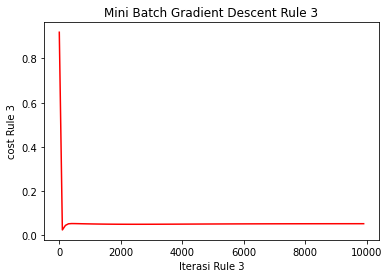

In [ ]:
plt.xlabel("Iterasi Rule 3")
plt.ylabel("cost Rule 3")
plt.title("Mini Batch Gradient Descent Rule 3")
plt.plot(mb_iterasi_rule3_list,mb_cost_rule3_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule3

0.05305433865766363

In [ ]:
mb_b0_rule3

0.30213793530528155

In [ ]:
mb_bpoly_rule3 #hasil untuk x1 dan x2

array([ 0.08072966,  0.62817745, -0.2757209 ])

In [ ]:
data_rule_3

Age     Weight   Height  BodyFat
57    62   91.28500  176.530     28.0
59    61   81.53300  167.005     24.6
60    62   97.97600  186.055     26.1
61    56   81.08000  173.990     29.8
63    61   80.73900  170.180     25.8
64    57   93.21300  177.800     32.3
70    62   75.97700  181.610     24.3
77    69   80.62600  173.990     22.2
83    70   77.45100  177.800     27.0
84    72   76.20300  175.895     27.0
85    67   75.75000  171.450     26.6
236   62   86.86300  183.515     24.8
237   63   99.40500  176.530     27.3
239   65   86.06900  167.005     29.9
241   65  101.83100  173.355     35.0
242   66  106.25400  182.880     30.4
243   67  103.30600  184.785     32.6
244   67   90.49200  173.990     29.0
246   69   97.74900  179.070     30.2
248   72   91.17200  177.165     33.6
249   72   84.70800  167.640     29.3
250   72   86.52300  179.070     26.0
251   70   94.12034  177.800     26.0

In [ ]:
X3=np.array(data_rule_3.iloc[::,:-1])
X3

array([[ 62.     ,  91.285  , 176.53   ],
       [ 61.     ,  81.533  , 167.005  ],
       [ 62.     ,  97.976  , 186.055  ],
       [ 56.     ,  81.08   , 173.99   ],
       [ 61.     ,  80.739  , 170.18   ],
       [ 57.     ,  93.213  , 177.8    ],
       [ 62.     ,  75.977  , 181.61   ],
       [ 69.     ,  80.626  , 173.99   ],
       [ 70.     ,  77.451  , 177.8    ],
       [ 72.     ,  76.203  , 175.895  ],
       [ 67.     ,  75.75   , 171.45   ],
       [ 62.     ,  86.863  , 183.515  ],
       [ 63.     ,  99.405  , 176.53   ],
       [ 65.     ,  86.069  , 167.005  ],
       [ 65.     , 101.831  , 173.355  ],
       [ 66.     , 106.254  , 182.88   ],
       [ 67.     , 103.306  , 184.785  ],
       [ 67.     ,  90.492  , 173.99   ],
       [ 69.     ,  97.749  , 179.07   ],
       [ 72.     ,  91.172  , 177.165  ],
       [ 72.     ,  84.708  , 167.64   ],
       [ 72.     ,  86.523  , 179.07   ],
       [ 70.     ,  94.12034, 177.8    ]])

In [ ]:
Y3=np.array(data_rule_3.iloc[:,3])
Y3

array([28. , 24.6, 26.1, 29.8, 25.8, 32.3, 24.3, 22.2, 27. , 27. , 26.6,
       24.8, 27.3, 29.9, 35. , 30.4, 32.6, 29. , 30.2, 33.6, 29.3, 26. ,
       26. ])

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X3_poly = poly_reg.fit_transform(X3)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X3_poly, Y3) 
# Proses Training Model
poly_reg.fit(X3, Y3) 

# Memprediksi hasil dengan regresi polynomial
y3_pred=lin_reg_2.predict(poly_reg.fit_transform(X3))
y3_pred

data_rule_3['pred'] = y3_pred
data_rule_3

Age     Weight   Height  BodyFat       pred
57    62   91.28500  176.530     28.0  26.965676
59    61   81.53300  167.005     24.6  26.927617
60    62   97.97600  186.055     26.1  26.888159
61    56   81.08000  173.990     29.8  29.787680
63    61   80.73900  170.180     25.8  25.964222
64    57   93.21300  177.800     32.3  30.778162
70    62   75.97700  181.610     24.3  24.927827
77    69   80.62600  173.990     22.2  25.359558
83    70   77.45100  177.800     27.0  25.448207
84    72   76.20300  175.895     27.0  27.039984
85    67   75.75000  171.450     26.6  24.267232
236   62   86.86300  183.515     24.8  24.714914
237   63   99.40500  176.530     27.3  30.588349
239   65   86.06900  167.005     29.9  27.608924
241   65  101.83100  173.355     35.0  33.761915
242   66  106.25400  182.880     30.4  32.034686
243   67  103.30600  184.785     32.6  29.742380
244   67   90.49200  173.990     29.0  27.362906
246   69   97.74900  179.070     30.2  29.918517
248   72   91.17200  177.165     33.6  29.963015
249   72   84.70800  167.640     29.3  30.412350
250   72   86.52300  179.070     26.0  28.059556
251   70   94.12034  177.800     26.0  29.278165

##Rule 4

In [ ]:
rule_4 = df_fuzz[df_fuzz['Rule']=="Jika X1 Muda X2 Berat X3 Tinggi maka Y obesitas"]
index=rule_4.index
data_rule_4=df_fuzz.iloc[index,:4]
data_rule_4

Age   Weight   Height  BodyFat
3     26   83.801  183.515     10.4
4     24   83.574  180.975     28.7
5     24   95.368  189.865     20.9
10    26   84.482  189.230      7.1
11    27   97.976  193.040      7.8
12    32   81.873  176.530     20.8
13    30   93.100  180.975     21.2
14    35   85.162  176.530     22.1
16    34   88.791  180.340     29.0
17    32   94.914  180.340     22.9
144   23   85.343  196.850     10.3
147   25   93.667  177.165     29.6
149   26  101.151  178.435     25.2
154   27   90.832  186.690     21.0
156   28   93.327  175.260     31.2
157   28   82.781  183.515     10.0
159   31   80.399  181.610     22.5
164   34   99.223  182.880     27.3
168   35  103.532  176.530     34.3

In [ ]:
data_rule_4.to_csv('hasilrule4.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule4=pd.read_csv('hasilrule4.csv',sep=',')
df_rule4

Unnamed: 0  Age   Weight   Height  BodyFat
0            3   26   83.801  183.515     10.4
1            4   24   83.574  180.975     28.7
2            5   24   95.368  189.865     20.9
3           10   26   84.482  189.230      7.1
4           11   27   97.976  193.040      7.8
5           12   32   81.873  176.530     20.8
6           13   30   93.100  180.975     21.2
7           14   35   85.162  176.530     22.1
8           16   34   88.791  180.340     29.0
9           17   32   94.914  180.340     22.9
10         144   23   85.343  196.850     10.3
11         147   25   93.667  177.165     29.6
12         149   26  101.151  178.435     25.2
13         154   27   90.832  186.690     21.0
14         156   28   93.327  175.260     31.2
15         157   28   82.781  183.515     10.0
16         159   31   80.399  181.610     22.5
17         164   34   99.223  182.880     27.3
18         168   35  103.532  176.530     34.3

In [ ]:
#df_rule4=df_rule4.drop(columns=['Unnamed: 0'])
#df_rule4

In [ ]:
from sklearn import preprocessing
sx4 = preprocessing.MinMaxScaler()
sy4 = preprocessing.MinMaxScaler()

scaled_X4 = sx4.fit_transform(data_rule_4.drop('BodyFat',axis='columns'))
scaled_y4 = sy4.fit_transform(data_rule_4['BodyFat'].values.reshape(rule_4.shape[0],1))

scaled_X4

array([[0.25      , 0.14706264, 0.38235294],
       [0.08333333, 0.13724982, 0.26470588],
       [0.08333333, 0.64708425, 0.67647059],
       [0.25      , 0.1765011 , 0.64705882],
       [0.33333333, 0.75982363, 0.82352941],
       [0.75      , 0.0637185 , 0.05882353],
       [0.58333333, 0.54904249, 0.26470588],
       [1.        , 0.20589634, 0.05882353],
       [0.91666667, 0.3627718 , 0.23529412],
       [0.75      , 0.62745861, 0.23529412],
       [0.        , 0.21372066, 1.        ],
       [0.16666667, 0.57355293, 0.08823529],
       [0.25      , 0.89707344, 0.14705882],
       [0.33333333, 0.45100073, 0.52941176],
       [0.41666667, 0.55885531, 0.        ],
       [0.41666667, 0.10296978, 0.38235294],
       [0.66666667, 0.        , 0.29411765],
       [0.91666667, 0.8137293 , 0.35294118],
       [1.        , 1.        , 0.05882353]])

In [ ]:
scaled_y4_reshape=scaled_y4.reshape(scaled_y4.shape[0],)
scaled_y4_reshape

array([0.12132353, 0.79411765, 0.50735294, 0.        , 0.02573529,
       0.50367647, 0.51838235, 0.55147059, 0.80514706, 0.58088235,
       0.11764706, 0.82720588, 0.66544118, 0.51102941, 0.88602941,
       0.10661765, 0.56617647, 0.74264706, 1.        ])

In [ ]:
def mini_batch_gradient_descent_rule4(X4, y4, iterasi, batch_size = 5, learning_rate = 0.001):

    jumlah_variabel_rule4 = X4.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule4 = np.ones(shape=(jumlah_variabel_rule4))       # b1, b2, ... b(jumlah variabel)
    b0_rule4 = 0                                         # b0 atau bias
    n = X4.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule4_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule4_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule4_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule4 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X4_smntr = X4[random_indices]
        y4_smntr = y4[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule4 = X4_smntr[j:j+batch_size]
            yj_rule4 = y4_smntr[j:j+batch_size]
            
            y4_pred = np.dot(bpoly_rule4, Xj_rule4.T) + b0_rule4           # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule4_grad = -(2/len(Xj_rule4))*(Xj_rule4.T.dot(yj_rule4-y4_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule4_grad = -(2/len(Xj_rule4))*np.sum(yj_rule4-y4_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule4 = bpoly_rule4 - learning_rate * bpoly_rule4_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule4 = b0_rule4 - learning_rate * b0_rule4_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule4 in range(jumlah_variabel_rule4):
                bp_rule4=bpoly_rule4[jv_rule4]
                bp.append(bp_rule4)
            b_rule4=[b0_rule4]+bp
        
            cost_rule4 = np.mean(np.square(yj_rule4-y4_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule4_list.append(cost_rule4)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule4_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule4_list.append(b_rule4)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule4, b0_rule4, cost_rule4, b_rule4_list, cost_rule4_list, iterasi_rule4_list  # Output

In [ ]:
import time
mulai_rule4 = time.time()
mb_bpoly_rule4, mb_b0_rule4, mb_cost_rule4, mb_b_rule4_list, mb_cost_rule4_list, mb_iterasi_rule4_list=mini_batch_gradient_descent_rule4 (scaled_X4, 
                                                                                                                                        scaled_y4_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 5, 
                                                                                                                                        learning_rate = 0.001)
selesai_rule4 = time.time()
waktu_komputasi_rule4 = (selesai_rule4 - mulai_rule4)
print("Waktu Komputasi Rule 4: ",waktu_komputasi_rule4)

Waktu Komputasi Rule 4:  3.0069689750671387


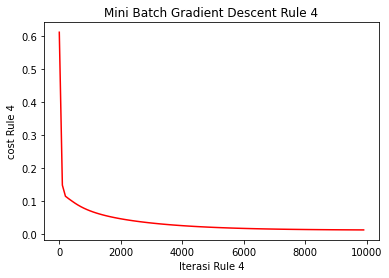

In [ ]:
plt.xlabel("Iterasi Rule 4")
plt.ylabel("cost Rule 4")
plt.title("Mini Batch Gradient Descent Rule 4")
plt.plot(mb_iterasi_rule4_list,mb_cost_rule4_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule4

0.012309999348637458

In [ ]:
mb_b0_rule4

0.5291242114763022

In [ ]:
mb_bpoly_rule4 #hasil untuk x1 dan x2

array([ 0.07466521,  0.37586676, -0.62680189])

In [ ]:
data_rule_4

Age   Weight   Height  BodyFat
3     26   83.801  183.515     10.4
4     24   83.574  180.975     28.7
5     24   95.368  189.865     20.9
10    26   84.482  189.230      7.1
11    27   97.976  193.040      7.8
12    32   81.873  176.530     20.8
13    30   93.100  180.975     21.2
14    35   85.162  176.530     22.1
16    34   88.791  180.340     29.0
17    32   94.914  180.340     22.9
144   23   85.343  196.850     10.3
147   25   93.667  177.165     29.6
149   26  101.151  178.435     25.2
154   27   90.832  186.690     21.0
156   28   93.327  175.260     31.2
157   28   82.781  183.515     10.0
159   31   80.399  181.610     22.5
164   34   99.223  182.880     27.3
168   35  103.532  176.530     34.3

In [ ]:
X4=np.array(data_rule_4.iloc[::,:-1])
X4

array([[ 26.   ,  83.801, 183.515],
       [ 24.   ,  83.574, 180.975],
       [ 24.   ,  95.368, 189.865],
       [ 26.   ,  84.482, 189.23 ],
       [ 27.   ,  97.976, 193.04 ],
       [ 32.   ,  81.873, 176.53 ],
       [ 30.   ,  93.1  , 180.975],
       [ 35.   ,  85.162, 176.53 ],
       [ 34.   ,  88.791, 180.34 ],
       [ 32.   ,  94.914, 180.34 ],
       [ 23.   ,  85.343, 196.85 ],
       [ 25.   ,  93.667, 177.165],
       [ 26.   , 101.151, 178.435],
       [ 27.   ,  90.832, 186.69 ],
       [ 28.   ,  93.327, 175.26 ],
       [ 28.   ,  82.781, 183.515],
       [ 31.   ,  80.399, 181.61 ],
       [ 34.   ,  99.223, 182.88 ],
       [ 35.   , 103.532, 176.53 ]])

In [ ]:
Y4=np.array(data_rule_4.iloc[:,3])
Y4

array([10.4, 28.7, 20.9,  7.1,  7.8, 20.8, 21.2, 22.1, 29. , 22.9, 10.3,
       29.6, 25.2, 21. , 31.2, 10. , 22.5, 27.3, 34.3])

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X4_poly = poly_reg.fit_transform(X4)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X4_poly, Y4) 
# Proses Training Model
poly_reg.fit(X4, Y4) 

# Memprediksi hasil dengan regresi polynomial
y4_pred=lin_reg_2.predict(poly_reg.fit_transform(X4))
y4_pred

data_rule_4['pred'] = y4_pred
data_rule_4

Age   Weight   Height  BodyFat       pred
3     26   83.801  183.515     10.4  17.330915
4     24   83.574  180.975     28.7  25.249046
5     24   95.368  189.865     20.9  17.497663
10    26   84.482  189.230      7.1  11.521905
11    27   97.976  193.040      7.8  10.665327
12    32   81.873  176.530     20.8  20.219139
13    30   93.100  180.975     21.2  21.152089
14    35   85.162  176.530     22.1  28.216625
16    34   88.791  180.340     29.0  25.872673
17    32   94.914  180.340     22.9  23.968615
144   23   85.343  196.850     10.3   8.847433
147   25   93.667  177.165     29.6  31.385857
149   26  101.151  178.435     25.2  27.395617
154   27   90.832  186.690     21.0  15.807356
156   28   93.327  175.260     31.2  27.748508
157   28   82.781  183.515     10.0  14.281425
159   31   80.399  181.610     22.5  14.407546
164   34   99.223  182.880     27.3  27.404945
168   35  103.532  176.530     34.3  33.327316

##Rule 5

In [ ]:
rule_5 = df_fuzz[df_fuzz['Rule']=="Jika X1 Paruhbaya X2 Normal X3 Tinggi maka Y normal"]
index=rule_5.index
data_rule_5=df_fuzz.iloc[index,:4]
data_rule_5

Age  Weight   Height  BodyFat
45    43  74.502  186.055     13.9
46    40  60.555  171.450     10.8
48    45  61.575  173.990     13.6
67    55  70.193  181.610     13.8
69    55  71.101  181.610     12.9
97    50  73.709  168.910     11.3
122   40  72.688  174.625     14.7
124   50  73.028  168.910     13.8
176   37  68.492  170.180     13.1
182   40  66.111  170.815     11.5
183   40  72.235  177.165     12.1
190   41  69.400  175.895     11.4
209   47  72.461  179.705     10.8
216   51  67.699  177.165     13.6
220   54  69.513  179.070     12.4
222   54  73.369  171.450     11.5

In [ ]:
data_rule_5.to_csv('hasilrule5.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule5=pd.read_csv('hasilrule5.csv',sep=',')
df_rule5

Unnamed: 0  Age  Weight   Height  BodyFat
0           45   43  74.502  186.055     13.9
1           46   40  60.555  171.450     10.8
2           48   45  61.575  173.990     13.6
3           67   55  70.193  181.610     13.8
4           69   55  71.101  181.610     12.9
5           97   50  73.709  168.910     11.3
6          122   40  72.688  174.625     14.7
7          124   50  73.028  168.910     13.8
8          176   37  68.492  170.180     13.1
9          182   40  66.111  170.815     11.5
10         183   40  72.235  177.165     12.1
11         190   41  69.400  175.895     11.4
12         209   47  72.461  179.705     10.8
13         216   51  67.699  177.165     13.6
14         220   54  69.513  179.070     12.4
15         222   54  73.369  171.450     11.5

In [ ]:
df_rule5=df_rule5.drop(columns=['Unnamed: 0'])
df_rule5

Age  Weight   Height  BodyFat
0    43  74.502  186.055     13.9
1    40  60.555  171.450     10.8
2    45  61.575  173.990     13.6
3    55  70.193  181.610     13.8
4    55  71.101  181.610     12.9
5    50  73.709  168.910     11.3
6    40  72.688  174.625     14.7
7    50  73.028  168.910     13.8
8    37  68.492  170.180     13.1
9    40  66.111  170.815     11.5
10   40  72.235  177.165     12.1
11   41  69.400  175.895     11.4
12   47  72.461  179.705     10.8
13   51  67.699  177.165     13.6
14   54  69.513  179.070     12.4
15   54  73.369  171.450     11.5

In [ ]:
from sklearn import preprocessing
sx5 = preprocessing.MinMaxScaler()
sy5 = preprocessing.MinMaxScaler()

scaled_X5 = sx5.fit_transform(data_rule_5.drop('BodyFat',axis='columns'))
scaled_y5 = sy5.fit_transform(data_rule_5['BodyFat'].values.reshape(rule_5.shape[0],1))

scaled_X5

array([[0.33333333, 1.        , 1.        ],
       [0.16666667, 0.        , 0.14814815],
       [0.44444444, 0.07313401, 0.2962963 ],
       [1.        , 0.69104467, 0.74074074],
       [1.        , 0.75614828, 0.74074074],
       [0.72222222, 0.94314189, 0.        ],
       [0.16666667, 0.86993619, 0.33333333],
       [0.72222222, 0.89431419, 0.        ],
       [0.        , 0.56908296, 0.07407407],
       [0.16666667, 0.39836524, 0.11111111],
       [0.16666667, 0.83745608, 0.48148148],
       [0.22222222, 0.63418656, 0.40740741],
       [0.55555556, 0.85366029, 0.62962963],
       [0.77777778, 0.51222485, 0.48148148],
       [0.94444444, 0.64228866, 0.59259259],
       [0.94444444, 0.91876389, 0.14814815]])

In [ ]:
scaled_y5_reshape=scaled_y5.reshape(scaled_y5.shape[0],)
scaled_y5_reshape

array([0.79487179, 0.        , 0.71794872, 0.76923077, 0.53846154,
       0.12820513, 1.        , 0.76923077, 0.58974359, 0.17948718,
       0.33333333, 0.15384615, 0.        , 0.71794872, 0.41025641,
       0.17948718])

In [ ]:
def mini_batch_gradient_descent_rule5(X5, y5, iterasi, batch_size = 5, learning_rate = 0.001):

    jumlah_variabel_rule5 = X5.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule5 = np.ones(shape=(jumlah_variabel_rule5))       # b1, b2, ... b(jumlah variabel)
    b0_rule5 = 0                                         # b0 atau bias
    n = X5.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule5_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule5_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule5_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule5 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X5_smntr = X5[random_indices]
        y5_smntr = y5[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule5 = X5_smntr[j:j+batch_size]
            yj_rule5 = y5_smntr[j:j+batch_size]
            
            y5_pred = np.dot(bpoly_rule5, Xj_rule5.T) + b0_rule5          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule5_grad = -(2/len(Xj_rule5))*(Xj_rule5.T.dot(yj_rule5-y5_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule5_grad = -(2/len(Xj_rule5))*np.sum(yj_rule5-y5_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule5 = bpoly_rule5 - learning_rate * bpoly_rule5_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule5 = b0_rule5 - learning_rate * b0_rule5_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule5 in range(jumlah_variabel_rule5):
                bp_rule5=bpoly_rule5[jv_rule5]
                bp.append(bp_rule5)
            b_rule5=[b0_rule5]+bp
        
            cost_rule5 = np.mean(np.square(yj_rule5-y5_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule5_list.append(cost_rule5)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule5_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule5_list.append(b_rule5)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule5, b0_rule5, cost_rule5, b_rule5_list, cost_rule5_list, iterasi_rule5_list  # Output

In [ ]:
import time
mulai_rule5 = time.time()
mb_bpoly_rule5, mb_b0_rule5, mb_cost_rule5, mb_b_rule5_list, mb_cost_rule5_list, mb_iterasi_rule5_list=mini_batch_gradient_descent_rule5 (scaled_X5, 
                                                                                                                                        scaled_y5_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 5, 
                                                                                                                                        learning_rate = 0.001)
selesai_rule5 = time.time()
waktu_komputasi_rule5 = (selesai_rule5 - mulai_rule5)
print("Waktu Komputasi Rule 5: ",waktu_komputasi_rule5)

Waktu Komputasi Rule 5:  3.0511600971221924


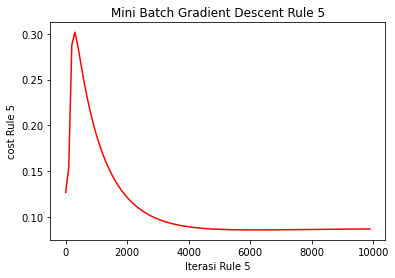

In [ ]:
plt.xlabel("Iterasi Rule 5")
plt.ylabel("cost Rule 5")
plt.title("Mini Batch Gradient Descent Rule 5")
plt.plot(mb_iterasi_rule5_list,mb_cost_rule5_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule5

0.08706894925251428

In [ ]:
mb_b0_rule5

0.3173871663683012

In [ ]:
mb_bpoly_rule5 #hasil untuk x1 dan x2

array([-0.29638232,  0.410502  ,  0.24283079])

In [ ]:
data_rule_5

Age  Weight   Height  BodyFat
45    43  74.502  186.055     13.9
46    40  60.555  171.450     10.8
48    45  61.575  173.990     13.6
67    55  70.193  181.610     13.8
69    55  71.101  181.610     12.9
97    50  73.709  168.910     11.3
122   40  72.688  174.625     14.7
124   50  73.028  168.910     13.8
176   37  68.492  170.180     13.1
182   40  66.111  170.815     11.5
183   40  72.235  177.165     12.1
190   41  69.400  175.895     11.4
209   47  72.461  179.705     10.8
216   51  67.699  177.165     13.6
220   54  69.513  179.070     12.4
222   54  73.369  171.450     11.5

In [ ]:
X5=np.array(data_rule_5.iloc[::,:-1])
X5

array([[ 43.   ,  74.502, 186.055],
       [ 40.   ,  60.555, 171.45 ],
       [ 45.   ,  61.575, 173.99 ],
       [ 55.   ,  70.193, 181.61 ],
       [ 55.   ,  71.101, 181.61 ],
       [ 50.   ,  73.709, 168.91 ],
       [ 40.   ,  72.688, 174.625],
       [ 50.   ,  73.028, 168.91 ],
       [ 37.   ,  68.492, 170.18 ],
       [ 40.   ,  66.111, 170.815],
       [ 40.   ,  72.235, 177.165],
       [ 41.   ,  69.4  , 175.895],
       [ 47.   ,  72.461, 179.705],
       [ 51.   ,  67.699, 177.165],
       [ 54.   ,  69.513, 179.07 ],
       [ 54.   ,  73.369, 171.45 ]])

In [ ]:
Y5=np.array(data_rule_5.iloc[:,3])
Y5

array([13.9, 10.8, 13.6, 13.8, 12.9, 11.3, 14.7, 13.8, 13.1, 11.5, 12.1,
       11.4, 10.8, 13.6, 12.4, 11.5])

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X5_poly = poly_reg.fit_transform(X5)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X5_poly, Y5) 
# Proses Training Model
poly_reg.fit(X5, Y5) 

# Memprediksi hasil dengan regresi polynomial
y5_pred=lin_reg_2.predict(poly_reg.fit_transform(X5))
y5_pred

data_rule_5['pred'] = y5_pred
data_rule_5

Age  Weight   Height  BodyFat       pred
45    43  74.502  186.055     13.9  13.860191
46    40  60.555  171.450     10.8  10.754696
48    45  61.575  173.990     13.6  13.596306
67    55  70.193  181.610     13.8  13.425443
69    55  71.101  181.610     12.9  12.664855
97    50  73.709  168.910     11.3  12.521656
122   40  72.688  174.625     14.7  13.931129
124   50  73.028  168.910     13.8  12.723842
176   37  68.492  170.180     13.1  13.283847
182   40  66.111  170.815     11.5  11.667907
183   40  72.235  177.165     12.1  12.868422
190   41  69.400  175.895     11.4  10.916722
209   47  72.461  179.705     10.8  11.007802
216   51  67.699  177.165     13.6  13.357302
220   54  69.513  179.070     12.4  13.366465
222   54  73.369  171.450     11.5  11.253415

##Rule 6

In [ ]:
rule_6 = df_fuzz[df_fuzz['Rule']=="Jika X1 Paruhbaya X2 Normal X3 Tinggi maka Y obesitas"]
index=rule_6.index
data_rule_6=df_fuzz.iloc[index,:4]
data_rule_6

Age  Weight   Height  BodyFat
50    47  71.781  183.515     10.2
52    51  62.256  172.085      8.0
66    54  68.719  179.705     21.5
71    55  66.565  174.625      8.8
92    47  74.956  179.070      8.5
113   42  73.935  178.435     21.3
133   50  71.214  169.545     26.1
136   39  75.636  179.705     21.8
175   37  65.884  175.895      9.9
194   42  73.822  184.785     22.8
196   42  70.874  175.260     22.0
201   43  68.039  175.895     22.1
208   47  72.802  178.435      9.6
210   49  63.730  172.720      7.1
217   51  70.080  177.800      7.5

In [ ]:
data_rule_6.to_csv('hasilrule6.csv')

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule6=pd.read_csv('hasilrule6.csv',sep=',')
df_rule6

Unnamed: 0  Age  Weight   Height  BodyFat
0           50   47  71.781  183.515     10.2
1           52   51  62.256  172.085      8.0
2           66   54  68.719  179.705     21.5
3           71   55  66.565  174.625      8.8
4           92   47  74.956  179.070      8.5
5          113   42  73.935  178.435     21.3
6          133   50  71.214  169.545     26.1
7          136   39  75.636  179.705     21.8
8          175   37  65.884  175.895      9.9
9          194   42  73.822  184.785     22.8
10         196   42  70.874  175.260     22.0
11         201   43  68.039  175.895     22.1
12         208   47  72.802  178.435      9.6
13         210   49  63.730  172.720      7.1
14         217   51  70.080  177.800      7.5

In [ ]:
df_rule6=df_rule6.drop(columns=['Unnamed: 0'])
df_rule6

Age  Weight   Height  BodyFat
0    47  71.781  183.515     10.2
1    51  62.256  172.085      8.0
2    54  68.719  179.705     21.5
3    55  66.565  174.625      8.8
4    47  74.956  179.070      8.5
5    42  73.935  178.435     21.3
6    50  71.214  169.545     26.1
7    39  75.636  179.705     21.8
8    37  65.884  175.895      9.9
9    42  73.822  184.785     22.8
10   42  70.874  175.260     22.0
11   43  68.039  175.895     22.1
12   47  72.802  178.435      9.6
13   49  63.730  172.720      7.1
14   51  70.080  177.800      7.5

In [ ]:
from sklearn import preprocessing
sx6 = preprocessing.MinMaxScaler()
sy6 = preprocessing.MinMaxScaler()

scaled_X6 = sx6.fit_transform(data_rule_6.drop('BodyFat',axis='columns'))
scaled_y6 = sy6.fit_transform(data_rule_6['BodyFat'].values.reshape(rule_6.shape[0],1))

scaled_X6

array([[0.55555556, 0.71188341, 0.91666667],
       [0.77777778, 0.        , 0.16666667],
       [0.94444444, 0.48303438, 0.66666667],
       [1.        , 0.32204783, 0.33333333],
       [0.55555556, 0.94917788, 0.625     ],
       [0.27777778, 0.87286996, 0.58333333],
       [0.72222222, 0.66950673, 0.        ],
       [0.11111111, 1.        , 0.66666667],
       [0.        , 0.27115097, 0.41666667],
       [0.27777778, 0.86442451, 1.        ],
       [0.27777778, 0.64409567, 0.375     ],
       [0.33333333, 0.43221226, 0.41666667],
       [0.55555556, 0.78819133, 0.58333333],
       [0.66666667, 0.11016442, 0.20833333],
       [0.77777778, 0.58475336, 0.54166667]])

In [ ]:
scaled_y6_reshape=scaled_y6.reshape(scaled_y6.shape[0],)
scaled_y6_reshape

array([0.16315789, 0.04736842, 0.75789474, 0.08947368, 0.07368421,
       0.74736842, 1.        , 0.77368421, 0.14736842, 0.82631579,
       0.78421053, 0.78947368, 0.13157895, 0.        , 0.02105263])

In [ ]:
def mini_batch_gradient_descent_rule6(X6, y6, iterasi, batch_size = 5, learning_rate = 0.001):

    jumlah_variabel_rule6 = X6.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule6 = np.ones(shape=(jumlah_variabel_rule6))       # b1, b2, ... b(jumlah variabel)
    b0_rule6 = 0                                         # b0 atau bias
    n = X6.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule6_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule6_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule6_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule6 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X6_smntr = X6[random_indices]
        y6_smntr = y6[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule6 = X6_smntr[j:j+batch_size]
            yj_rule6 = y6_smntr[j:j+batch_size]
            
            y6_pred = np.dot(bpoly_rule6, Xj_rule6.T) + b0_rule6          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule6_grad = -(2/len(Xj_rule6))*(Xj_rule6.T.dot(yj_rule6-y6_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule6_grad = -(2/len(Xj_rule6))*np.sum(yj_rule6-y6_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule6 = bpoly_rule6 - learning_rate * bpoly_rule6_grad        # Memperbaharui bpoly(bobot) setiap iterasi 
            b0_rule6 = b0_rule6 - learning_rate * b0_rule6_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule6 in range(jumlah_variabel_rule6):
                bp_rule6=bpoly_rule6[jv_rule6]
                bp.append(bp_rule6)
            b_rule6=[b0_rule6]+bp
        
            cost_rule6 = np.mean(np.square(yj_rule6-y6_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule6_list.append(cost_rule6)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule6_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule6_list.append(b_rule6)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule6, b0_rule6, cost_rule6, b_rule6_list, cost_rule6_list, iterasi_rule6_list  # Output

In [ ]:
import time
mulai_rule6 = time.time()
mb_bpoly_rule6, mb_b0_rule6, mb_cost_rule6, mb_b_rule6_list, mb_cost_rule6_list, mb_iterasi_rule6_list=mini_batch_gradient_descent_rule6 (scaled_X6, 
                                                                                                                                        scaled_y6_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 5, 
                                                                                                                                        learning_rate = 0.001)
selesai_rule6 = time.time()
waktu_komputasi_rule6 = (selesai_rule6 - mulai_rule6)
print("Waktu Komputasi Rule 6: ",waktu_komputasi_rule6)

Waktu Komputasi Rule 6:  2.767202615737915


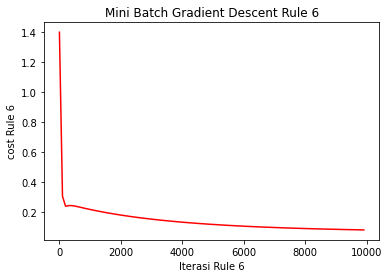

In [ ]:
plt.xlabel("Iterasi Rule 6")
plt.ylabel("cost Rule 6")
plt.title("Mini Batch Gradient Descent Rule 6")
plt.plot(mb_iterasi_rule6_list,mb_cost_rule6_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule6

0.0808733667790941

In [ ]:
mb_b0_rule6

0.26946134885212514

In [ ]:
mb_bpoly_rule6 #hasil untuk x1 dan x2

array([-0.17108625,  0.6608388 , -0.28921935])

In [ ]:
data_rule_6

Age  Weight   Height  BodyFat
50    47  71.781  183.515     10.2
52    51  62.256  172.085      8.0
66    54  68.719  179.705     21.5
71    55  66.565  174.625      8.8
92    47  74.956  179.070      8.5
113   42  73.935  178.435     21.3
133   50  71.214  169.545     26.1
136   39  75.636  179.705     21.8
175   37  65.884  175.895      9.9
194   42  73.822  184.785     22.8
196   42  70.874  175.260     22.0
201   43  68.039  175.895     22.1
208   47  72.802  178.435      9.6
210   49  63.730  172.720      7.1
217   51  70.080  177.800      7.5

In [ ]:
X6=np.array(data_rule_6.iloc[::,:-1])
X6

array([[ 47.   ,  71.781, 183.515],
       [ 51.   ,  62.256, 172.085],
       [ 54.   ,  68.719, 179.705],
       [ 55.   ,  66.565, 174.625],
       [ 47.   ,  74.956, 179.07 ],
       [ 42.   ,  73.935, 178.435],
       [ 50.   ,  71.214, 169.545],
       [ 39.   ,  75.636, 179.705],
       [ 37.   ,  65.884, 175.895],
       [ 42.   ,  73.822, 184.785],
       [ 42.   ,  70.874, 175.26 ],
       [ 43.   ,  68.039, 175.895],
       [ 47.   ,  72.802, 178.435],
       [ 49.   ,  63.73 , 172.72 ],
       [ 51.   ,  70.08 , 177.8  ]])

In [ ]:
Y6=np.array(data_rule_6.iloc[:,3])
Y6

array([10.2,  8. , 21.5,  8.8,  8.5, 21.3, 26.1, 21.8,  9.9, 22.8, 22. ,
       22.1,  9.6,  7.1,  7.5])

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X6_poly = poly_reg.fit_transform(X6)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X6_poly, Y6) 
# Proses Training Model
poly_reg.fit(X6, Y6) 

# Memprediksi hasil dengan regresi polynomial
y6_pred=lin_reg_2.predict(poly_reg.fit_transform(X6))
y6_pred

data_rule_6['pred'] = y6_pred
data_rule_6

Age  Weight   Height  BodyFat       pred
50    47  71.781  183.515     10.2  17.823286
52    51  62.256  172.085      8.0   7.196254
66    54  68.719  179.705     21.5  15.842149
71    55  66.565  174.625      8.8  11.048323
92    47  74.956  179.070      8.5   5.936027
113   42  73.935  178.435     21.3  20.469480
133   50  71.214  169.545     26.1  25.878514
136   39  75.636  179.705     21.8  24.565373
175   37  65.884  175.895      9.9  11.247534
194   42  73.822  184.785     22.8  17.927716
196   42  70.874  175.260     22.0  22.142318
201   43  68.039  175.895     22.1  17.333086
208   47  72.802  178.435      9.6  10.987999
210   49  63.730  172.720      7.1   8.390854
217   51  70.080  177.800      7.5  10.411085

##Rule 7

In [ ]:
rule_7 = df_fuzz[df_fuzz['Rule']=="Jika X1 Muda X2 Berat X3 Tinggi maka Y overweight"]
index=rule_7.index
data_rule_7=df_fuzz.iloc[index,:4]
data_rule_7

Age   Weight   Height  BodyFat
6     26   82.100  177.165     19.2
18    28   83.348  172.085     16.0
19    33   96.048  186.690     16.5
20    28   81.193  172.720     19.1
21    28   90.945  177.165     15.2
146   24   94.574  184.785     19.2
151   26  109.656  189.230     19.6
155   28   77.791  191.135     17.3
165   35   98.429  187.325     19.2
167   35  101.945  183.515     20.3
169   35   78.358  176.530     16.5
172   35   80.399  180.340     20.5

In [ ]:
data_rule_7.to_csv('hasilrule7.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule7=pd.read_csv('hasilrule7.csv',sep=',')
df_rule7

Unnamed: 0  Age   Weight   Height  BodyFat
0            6   26   82.100  177.165     19.2
1           18   28   83.348  172.085     16.0
2           19   33   96.048  186.690     16.5
3           20   28   81.193  172.720     19.1
4           21   28   90.945  177.165     15.2
5          146   24   94.574  184.785     19.2
6          151   26  109.656  189.230     19.6
7          155   28   77.791  191.135     17.3
8          165   35   98.429  187.325     19.2
9          167   35  101.945  183.515     20.3
10         169   35   78.358  176.530     16.5
11         172   35   80.399  180.340     20.5

In [ ]:
df_rule7=df_rule7.drop(columns=['Unnamed: 0'])
df_rule7

Age   Weight   Height  BodyFat
0    26   82.100  177.165     19.2
1    28   83.348  172.085     16.0
2    33   96.048  186.690     16.5
3    28   81.193  172.720     19.1
4    28   90.945  177.165     15.2
5    24   94.574  184.785     19.2
6    26  109.656  189.230     19.6
7    28   77.791  191.135     17.3
8    35   98.429  187.325     19.2
9    35  101.945  183.515     20.3
10   35   78.358  176.530     16.5
11   35   80.399  180.340     20.5

In [ ]:
from sklearn import preprocessing
sx7 = preprocessing.MinMaxScaler()
sy7 = preprocessing.MinMaxScaler()

scaled_X7 = sx7.fit_transform(data_rule_7.drop('BodyFat',axis='columns'))
scaled_y7 = sy7.fit_transform(data_rule_7['BodyFat'].values.reshape(rule_7.shape[0],1))

scaled_X7

array([[0.18181818, 0.13522674, 0.26666667],
       [0.36363636, 0.17439197, 0.        ],
       [0.81818182, 0.57294838, 0.76666667],
       [0.36363636, 0.10676291, 0.03333333],
       [0.36363636, 0.41280402, 0.26666667],
       [0.        , 0.52669073, 0.66666667],
       [0.18181818, 1.        , 0.9       ],
       [0.36363636, 0.        , 1.        ],
       [1.        , 0.64766986, 0.8       ],
       [1.        , 0.75801036, 0.6       ],
       [1.        , 0.01779382, 0.23333333],
       [1.        , 0.08184528, 0.43333333]])

In [ ]:
scaled_y7_reshape=scaled_y7.reshape(scaled_y7.shape[0],)
scaled_y7_reshape

array([0.75471698, 0.1509434 , 0.24528302, 0.73584906, 0.        ,
       0.75471698, 0.83018868, 0.39622642, 0.75471698, 0.96226415,
       0.24528302, 1.        ])

In [ ]:
def mini_batch_gradient_descent_rule7(X7, y7, iterasi, batch_size = 5, learning_rate = 0.001):

    jumlah_variabel_rule7 = X7.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule7 = np.ones(shape=(jumlah_variabel_rule7))       # b1, b2, ... b(jumlah variabel)
    b0_rule7 = 0                                         # b0 atau bias
    n = X7.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule7_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule7_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule7_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule7 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X7_smntr = X7[random_indices]
        y7_smntr = y7[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule7 = X7_smntr[j:j+batch_size]
            yj_rule7 = y7_smntr[j:j+batch_size]
            
            y7_pred = np.dot(bpoly_rule7, Xj_rule7.T) + b0_rule7          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule7_grad = -(2/len(Xj_rule7))*(Xj_rule7.T.dot(yj_rule7-y7_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule7_grad = -(2/len(Xj_rule7))*np.sum(yj_rule7-y7_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule7 = bpoly_rule7 - learning_rate * bpoly_rule7_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule7 = b0_rule7 - learning_rate * b0_rule7_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule7 in range(jumlah_variabel_rule7):
                bp_rule7=bpoly_rule7[jv_rule7]
                bp.append(bp_rule7)
            b_rule7=[b0_rule7]+bp
        
            cost_rule7 = np.mean(np.square(yj_rule7-y7_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule7_list.append(cost_rule7)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule7_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule7_list.append(b_rule7)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule7, b0_rule7, cost_rule7, b_rule7_list, cost_rule7_list, iterasi_rule7_list  # Output

In [ ]:
import time
mulai_rule7 = time.time()
mb_bpoly_rule7, mb_b0_rule7, mb_cost_rule7, mb_b_rule7_list, mb_cost_rule7_list, mb_iterasi_rule7_list=mini_batch_gradient_descent_rule7 (scaled_X7, 
                                                                                                                                        scaled_y7_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 5, 
                                                                                                                                        learning_rate = 0.001)
selesai_rule7 = time.time()
waktu_komputasi_rule7 = (selesai_rule7 - mulai_rule7)
print("Waktu Komputasi Rule 7: ",waktu_komputasi_rule7)

Waktu Komputasi Rule 7:  2.9516184329986572


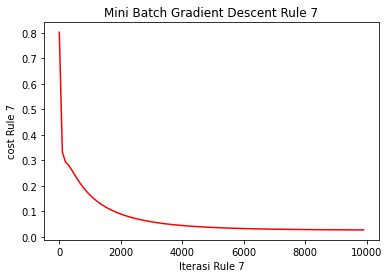

In [ ]:
plt.xlabel("Iterasi Rule 7")
plt.ylabel("cost Rule 7")
plt.title("Mini Batch Gradient Descent Rule 7")
plt.plot(mb_iterasi_rule7_list,mb_cost_rule7_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule7

0.027444191608343813

In [ ]:
mb_b0_rule7

0.4688793931563229

In [ ]:
mb_bpoly_rule7

array([0.03550674, 0.25216531, 0.04576313])

In [ ]:
data_rule_7

Age   Weight   Height  BodyFat
6     26   82.100  177.165     19.2
18    28   83.348  172.085     16.0
19    33   96.048  186.690     16.5
20    28   81.193  172.720     19.1
21    28   90.945  177.165     15.2
146   24   94.574  184.785     19.2
151   26  109.656  189.230     19.6
155   28   77.791  191.135     17.3
165   35   98.429  187.325     19.2
167   35  101.945  183.515     20.3
169   35   78.358  176.530     16.5
172   35   80.399  180.340     20.5

In [ ]:
X7=np.array(data_rule_7.iloc[::,:-1])
X7

array([[ 26.   ,  82.1  , 177.165],
       [ 28.   ,  83.348, 172.085],
       [ 33.   ,  96.048, 186.69 ],
       [ 28.   ,  81.193, 172.72 ],
       [ 28.   ,  90.945, 177.165],
       [ 24.   ,  94.574, 184.785],
       [ 26.   , 109.656, 189.23 ],
       [ 28.   ,  77.791, 191.135],
       [ 35.   ,  98.429, 187.325],
       [ 35.   , 101.945, 183.515],
       [ 35.   ,  78.358, 176.53 ],
       [ 35.   ,  80.399, 180.34 ]])

In [ ]:
Y7=np.array(data_rule_7.iloc[:,3])
Y7

array([19.2, 16. , 16.5, 19.1, 15.2, 19.2, 19.6, 17.3, 19.2, 20.3, 16.5,
       20.5])

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X7_poly = poly_reg.fit_transform(X7)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X7_poly, Y7) 
# Proses Training Model
poly_reg.fit(X7, Y7) 

# Memprediksi hasil dengan regresi polynomial
y7_pred=lin_reg_2.predict(poly_reg.fit_transform(X7))
y7_pred

data_rule_7['pred'] = y7_pred
data_rule_7

Age   Weight   Height  BodyFat       pred
6     26   82.100  177.165     19.2  20.104644
18    28   83.348  172.085     16.0  16.705238
19    33   96.048  186.690     16.5  16.157689
20    28   81.193  172.720     19.1  17.302021
21    28   90.945  177.165     15.2  15.807128
146   24   94.574  184.785     19.2  18.714202
151   26  109.656  189.230     19.6  19.692688
155   28   77.791  191.135     17.3  17.364528
165   35   98.429  187.325     19.2  19.994910
167   35  101.945  183.515     20.3  19.790594
169   35   78.358  176.530     16.5  17.602782
172   35   80.399  180.340     20.5  19.363575

##Rule 8

In [ ]:
rule_8 = df_fuzz[df_fuzz['Rule']=="Jika X1 Muda X2 Normal X3 Tinggi maka Y obesitas"]
index=rule_8.index
data_rule_8=df_fuzz.iloc[index,:4]
data_rule_8

Age  Weight   Height  BodyFat
2     22  69.853  168.275     25.3
15    35  73.822  167.640     20.9
26    34  59.647  171.450      7.9
27    31  67.132  171.450     22.9
29    29  72.915  175.260      8.8
143   23  72.461  183.515      9.4
150   26  69.059  175.260      9.4
152   27  66.224  183.515     10.1
160   31  68.606  183.515      9.4
166   35  75.410  172.720     21.8

In [ ]:
data_rule_8.to_csv('hasilrule8.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule8=pd.read_csv('hasilrule8.csv',sep=',')
df_rule8

Unnamed: 0  Age  Weight   Height  BodyFat
0           2   22  69.853  168.275     25.3
1          15   35  73.822  167.640     20.9
2          26   34  59.647  171.450      7.9
3          27   31  67.132  171.450     22.9
4          29   29  72.915  175.260      8.8
5         143   23  72.461  183.515      9.4
6         150   26  69.059  175.260      9.4
7         152   27  66.224  183.515     10.1
8         160   31  68.606  183.515      9.4
9         166   35  75.410  172.720     21.8

In [ ]:
df_rule8=df_rule8.drop(columns=['Unnamed: 0'])
df_rule8

Age  Weight   Height  BodyFat
0   22  69.853  168.275     25.3
1   35  73.822  167.640     20.9
2   34  59.647  171.450      7.9
3   31  67.132  171.450     22.9
4   29  72.915  175.260      8.8
5   23  72.461  183.515      9.4
6   26  69.059  175.260      9.4
7   27  66.224  183.515     10.1
8   31  68.606  183.515      9.4
9   35  75.410  172.720     21.8

In [ ]:
from sklearn import preprocessing
sx8 = preprocessing.MinMaxScaler()
sy8 = preprocessing.MinMaxScaler()

scaled_X8 = sx8.fit_transform(data_rule_8.drop('BodyFat',axis='columns'))
scaled_y8 = sy8.fit_transform(data_rule_8['BodyFat'].values.reshape(rule_8.shape[0],1))

scaled_X8

array([[0.        , 0.64746558, 0.04      ],
       [1.        , 0.89925776, 0.        ],
       [0.92307692, 0.        , 0.24      ],
       [0.69230769, 0.47484616, 0.24      ],
       [0.53846154, 0.84171795, 0.48      ],
       [0.07692308, 0.81291632, 1.        ],
       [0.30769231, 0.59709446, 0.48      ],
       [0.38461538, 0.41724291, 1.        ],
       [0.69230769, 0.56835628, 1.        ],
       [1.        , 1.        , 0.32      ]])

In [ ]:
scaled_y8_reshape=scaled_y8.reshape(scaled_y8.shape[0],)
scaled_y8_reshape

array([1.        , 0.74712644, 0.        , 0.86206897, 0.05172414,
       0.0862069 , 0.0862069 , 0.12643678, 0.0862069 , 0.79885057])

In [ ]:
def mini_batch_gradient_descent_rule8(X8, y8, iterasi, batch_size = 5, learning_rate = 0.001):

    jumlah_variabel_rule8 = X8.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule8 = np.ones(shape=(jumlah_variabel_rule8))       # b1, b2, ... b(jumlah variabel)
    b0_rule8 = 0                                         # b0 atau bias
    n = X8.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule8_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule8_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule8_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule8 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X8_smntr = X8[random_indices]
        y8_smntr = y8[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule8 = X8_smntr[j:j+batch_size]
            yj_rule8 = y8_smntr[j:j+batch_size]
            
            y8_pred = np.dot(bpoly_rule8, Xj_rule8.T) + b0_rule8          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule8_grad = -(2/len(Xj_rule8))*(Xj_rule8.T.dot(yj_rule8-y8_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule8_grad = -(2/len(Xj_rule8))*np.sum(yj_rule8-y8_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule8 = bpoly_rule8 - learning_rate * bpoly_rule8_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule8 = b0_rule8 - learning_rate * b0_rule8_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule8 in range(jumlah_variabel_rule8):
                bp_rule8=bpoly_rule8[jv_rule8]
                bp.append(bp_rule8)
            b_rule8=[b0_rule8]+bp
        
            cost_rule8 = np.mean(np.square(yj_rule8-y8_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule8_list.append(cost_rule8)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule8_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule8_list.append(b_rule8)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule8, b0_rule8, cost_rule8, b_rule8_list, cost_rule8_list, iterasi_rule8_list  # Output

In [ ]:
import time
mulai_rule8 = time.time()
mb_bpoly_rule8, mb_b0_rule8, mb_cost_rule8, mb_b_rule8_list, mb_cost_rule8_list, mb_iterasi_rule8_list=mini_batch_gradient_descent_rule8 (scaled_X8, 
                                                                                                                                        scaled_y8_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 5, 
                                                                                                                                        learning_rate = 0.001)
selesai_rule8 = time.time()
waktu_komputasi_rule8 = (selesai_rule8 - mulai_rule8)
print("Waktu Komputasi Rule 8: ",waktu_komputasi_rule8)

Waktu Komputasi Rule 8:  2.692533016204834


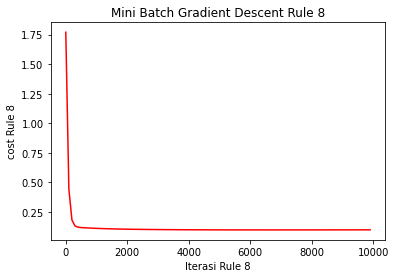

In [ ]:
plt.xlabel("Iterasi Rule 8")
plt.ylabel("cost Rule 8")
plt.title("Mini Batch Gradient Descent Rule 8")
plt.plot(mb_iterasi_rule8_list,mb_cost_rule8_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule8

0.09828878438400487

In [ ]:
mb_b0_rule8

0.26639283209154463

In [ ]:
mb_bpoly_rule8

array([ 0.02665298,  0.61297216, -0.60475247])

In [ ]:
data_rule_8

Age  Weight   Height  BodyFat
2     22  69.853  168.275     25.3
15    35  73.822  167.640     20.9
26    34  59.647  171.450      7.9
27    31  67.132  171.450     22.9
29    29  72.915  175.260      8.8
143   23  72.461  183.515      9.4
150   26  69.059  175.260      9.4
152   27  66.224  183.515     10.1
160   31  68.606  183.515      9.4
166   35  75.410  172.720     21.8

In [ ]:
X8=np.array(data_rule_8.iloc[::,:-1])
X8

array([[ 22.   ,  69.853, 168.275],
       [ 35.   ,  73.822, 167.64 ],
       [ 34.   ,  59.647, 171.45 ],
       [ 31.   ,  67.132, 171.45 ],
       [ 29.   ,  72.915, 175.26 ],
       [ 23.   ,  72.461, 183.515],
       [ 26.   ,  69.059, 175.26 ],
       [ 27.   ,  66.224, 183.515],
       [ 31.   ,  68.606, 183.515],
       [ 35.   ,  75.41 , 172.72 ]])

In [ ]:
Y8=np.array(data_rule_8.iloc[:,3])
Y8

array([25.3, 20.9,  7.9, 22.9,  8.8,  9.4,  9.4, 10.1,  9.4, 21.8])

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X8_poly = poly_reg.fit_transform(X8)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X8_poly, Y8) 
# Proses Training Model
poly_reg.fit(X8, Y8) 

# Memprediksi hasil dengan regresi polynomial
y8_pred=lin_reg_2.predict(poly_reg.fit_transform(X8))
y8_pred

data_rule_8['pred'] = y8_pred
data_rule_8

Age  Weight   Height  BodyFat  pred
2     22  69.853  168.275     25.3  25.3
15    35  73.822  167.640     20.9  20.9
26    34  59.647  171.450      7.9   7.9
27    31  67.132  171.450     22.9  22.9
29    29  72.915  175.260      8.8   8.8
143   23  72.461  183.515      9.4   9.4
150   26  69.059  175.260      9.4   9.4
152   27  66.224  183.515     10.1  10.1
160   31  68.606  183.515      9.4   9.4
166   35  75.410  172.720     21.8  21.8

##Rule 9

In [ ]:
rule_9 = df_fuzz[df_fuzz['Rule']=="Jika X1 Tua X2 Normal X3 Tinggi maka Y obesitas"]
index=rule_9.index
data_rule_9=df_fuzz.iloc[index,:4]
data_rule_9

Age  Weight   Height  BodyFat
72    56  72.915  187.325      8.5
76    57  73.709  176.530      8.8
78    81  73.142  178.435     21.5
80    67  74.276  172.085     31.4
81    64  68.152  170.815     26.8
87    64  72.575  167.005     23.1
230   57  67.018  167.005     10.6
233   58  73.369  170.815     26.7
234   60  71.554  171.450     25.8

In [ ]:
data_rule_9.to_csv('hasilrule9.csv')

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule9=pd.read_csv('hasilrule9.csv',sep=',')
df_rule9

Unnamed: 0  Age  Weight   Height  BodyFat
0          72   56  72.915  187.325      8.5
1          76   57  73.709  176.530      8.8
2          78   81  73.142  178.435     21.5
3          80   67  74.276  172.085     31.4
4          81   64  68.152  170.815     26.8
5          87   64  72.575  167.005     23.1
6         230   57  67.018  167.005     10.6
7         233   58  73.369  170.815     26.7
8         234   60  71.554  171.450     25.8

In [ ]:
df_rule9=df_rule9.drop(columns=['Unnamed: 0'])
df_rule9

Age  Weight   Height  BodyFat
0   56  72.915  187.325      8.5
1   57  73.709  176.530      8.8
2   81  73.142  178.435     21.5
3   67  74.276  172.085     31.4
4   64  68.152  170.815     26.8
5   64  72.575  167.005     23.1
6   57  67.018  167.005     10.6
7   58  73.369  170.815     26.7
8   60  71.554  171.450     25.8

In [ ]:
from sklearn import preprocessing
sx9 = preprocessing.MinMaxScaler()
sy9 = preprocessing.MinMaxScaler()

scaled_X9 = sx9.fit_transform(data_rule_9.drop('BodyFat',axis='columns'))
scaled_y9 = sy9.fit_transform(data_rule_9['BodyFat'].values.reshape(rule_9.shape[0],1))

scaled_X9

array([[0.        , 0.81248278, 1.        ],
       [0.04      , 0.92187931, 0.46875   ],
       [1.        , 0.84375861, 0.5625    ],
       [0.44      , 1.        , 0.25      ],
       [0.32      , 0.15624139, 0.1875    ],
       [0.32      , 0.76563792, 0.        ],
       [0.04      , 0.        , 0.        ],
       [0.08      , 0.87503444, 0.1875    ],
       [0.16      , 0.62496556, 0.21875   ]])

In [ ]:
scaled_y9_reshape=scaled_y9.reshape(scaled_y9.shape[0],)
scaled_y9_reshape

array([0.        , 0.01310044, 0.56768559, 1.        , 0.79912664,
       0.63755459, 0.09170306, 0.79475983, 0.75545852])

In [ ]:
def mini_batch_gradient_descent_rule9(X9, y9, iterasi, batch_size = 5, learning_rate = 0.001):

    jumlah_variabel_rule9 = X9.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule9 = np.ones(shape=(jumlah_variabel_rule9))       # b1, b2, ... b(jumlah variabel)
    b0_rule9 = 0                                         # b0 atau bias
    n = X9.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule9_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule9_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule9_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule9 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X9_smntr = X9[random_indices]
        y9_smntr = y9[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule9 = X9_smntr[j:j+batch_size]
            yj_rule9 = y9_smntr[j:j+batch_size]
            
            y9_pred = np.dot(bpoly_rule9, Xj_rule9.T) + b0_rule9          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule9_grad = -(2/len(Xj_rule9))*(Xj_rule9.T.dot(yj_rule9-y9_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule9_grad = -(2/len(Xj_rule9))*np.sum(yj_rule9-y9_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule9 = bpoly_rule9 - learning_rate * bpoly_rule9_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule9 = b0_rule9 - learning_rate * b0_rule9_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule9 in range(jumlah_variabel_rule9):
                bp_rule9=bpoly_rule9[jv_rule9]
                bp.append(bp_rule9)
            b_rule9=[b0_rule9]+bp
        
            cost_rule9 = np.mean(np.square(yj_rule9-y9_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule9_list.append(cost_rule9)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule9_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule9_list.append(b_rule9)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule9, b0_rule9, cost_rule9, b_rule9_list, cost_rule9_list, iterasi_rule9_list  # Output

In [ ]:
import time
mulai_rule9 = time.time()
mb_bpoly_rule9, mb_b0_rule9, mb_cost_rule9, mb_b_rule9_list, mb_cost_rule9_list, mb_iterasi_rule9_list=mini_batch_gradient_descent_rule9 (scaled_X9, 
                                                                                                                                        scaled_y9_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 5, 
                                                                                                                                        learning_rate = 0.001)
selesai_rule9 = time.time()
waktu_komputasi_rule9 = (selesai_rule9 - mulai_rule9)
print("Waktu Komputasi Rule 9: ",waktu_komputasi_rule9)

Waktu Komputasi Rule 9:  2.424288034439087


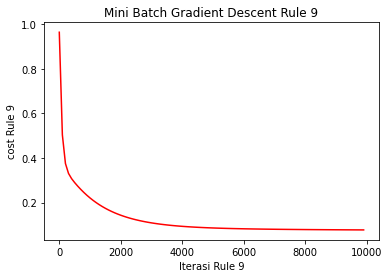

In [ ]:
plt.xlabel("Iterasi Rule 9")
plt.ylabel("cost Rule 9")
plt.title("Mini Batch Gradient Descent Rule 9")
plt.plot(mb_iterasi_rule9_list,mb_cost_rule9_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule9

0.0768728995557179

In [ ]:
mb_b0_rule9

0.37768348108869715

In [ ]:
mb_bpoly_rule9

array([ 0.48630367,  0.33285092, -0.65996379])

In [ ]:
data_rule_9

Age  Weight   Height  BodyFat
72    56  72.915  187.325      8.5
76    57  73.709  176.530      8.8
78    81  73.142  178.435     21.5
80    67  74.276  172.085     31.4
81    64  68.152  170.815     26.8
87    64  72.575  167.005     23.1
230   57  67.018  167.005     10.6
233   58  73.369  170.815     26.7
234   60  71.554  171.450     25.8

In [ ]:
X9=np.array(data_rule_9.iloc[::,:-1])
X9

array([[ 56.   ,  72.915, 187.325],
       [ 57.   ,  73.709, 176.53 ],
       [ 81.   ,  73.142, 178.435],
       [ 67.   ,  74.276, 172.085],
       [ 64.   ,  68.152, 170.815],
       [ 64.   ,  72.575, 167.005],
       [ 57.   ,  67.018, 167.005],
       [ 58.   ,  73.369, 170.815],
       [ 60.   ,  71.554, 171.45 ]])

In [ ]:
Y9=np.array(data_rule_9.iloc[:,3])
Y9

array([ 8.5,  8.8, 21.5, 31.4, 26.8, 23.1, 10.6, 26.7, 25.8])

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X9_poly = poly_reg.fit_transform(X9)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X9_poly, Y9) 
# Proses Training Model
poly_reg.fit(X9, Y9) 

# Memprediksi hasil dengan regresi polynomial
y9_pred=lin_reg_2.predict(poly_reg.fit_transform(X9))
y9_pred

data_rule_9['pred'] = y9_pred
data_rule_9

Age  Weight   Height  BodyFat  pred
72    56  72.915  187.325      8.5   8.5
76    57  73.709  176.530      8.8   8.8
78    81  73.142  178.435     21.5  21.5
80    67  74.276  172.085     31.4  31.4
81    64  68.152  170.815     26.8  26.8
87    64  72.575  167.005     23.1  23.1
230   57  67.018  167.005     10.6  10.6
233   58  73.369  170.815     26.7  26.7
234   60  71.554  171.450     25.8  25.8

##Rule 10

In [ ]:
rule_10 = df_fuzz[df_fuzz['Rule']=="Jika X1 Tua X2 Berat X3 Tinggi maka Y overweight"]
index=rule_10.index
data_rule_10=df_fuzz.iloc[index,:4]
data_rule_10

Age  Weight   Height  BodyFat
56    58  82.327  172.720     20.4
79    66  77.678  175.895     18.8
82    64  86.296  184.785     18.4
228   56  79.152  176.530     14.9
229   56  76.090  173.990     17.0
231   57  82.667  182.245     16.1
232   58  79.605  181.610     15.4
235   62  76.544  171.450     18.6

In [ ]:
data_rule_10.to_csv('hasilrule10.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule10=pd.read_csv('hasilrule10.csv',sep=',')
df_rule10

Unnamed: 0  Age  Weight   Height  BodyFat
0          56   58  82.327  172.720     20.4
1          79   66  77.678  175.895     18.8
2          82   64  86.296  184.785     18.4
3         228   56  79.152  176.530     14.9
4         229   56  76.090  173.990     17.0
5         231   57  82.667  182.245     16.1
6         232   58  79.605  181.610     15.4
7         235   62  76.544  171.450     18.6

In [ ]:
df_rule10=df_rule10.drop(columns=['Unnamed: 0'])
df_rule10

Age  Weight   Height  BodyFat
0   58  82.327  172.720     20.4
1   66  77.678  175.895     18.8
2   64  86.296  184.785     18.4
3   56  79.152  176.530     14.9
4   56  76.090  173.990     17.0
5   57  82.667  182.245     16.1
6   58  79.605  181.610     15.4
7   62  76.544  171.450     18.6

In [ ]:
from sklearn import preprocessing
sx10 = preprocessing.MinMaxScaler()
sy10 = preprocessing.MinMaxScaler()

scaled_X10 = sx10.fit_transform(data_rule_10.drop('BodyFat',axis='columns'))
scaled_y10 = sy10.fit_transform(data_rule_10['BodyFat'].values.reshape(rule_10.shape[0],1))

scaled_X10

array([[0.2       , 0.61111111, 0.0952381 ],
       [1.        , 0.15559475, 0.33333333],
       [0.8       , 1.        , 1.        ],
       [0.        , 0.3000196 , 0.38095238],
       [0.        , 0.        , 0.19047619],
       [0.1       , 0.64442485, 0.80952381],
       [0.2       , 0.34440525, 0.76190476],
       [0.6       , 0.04448364, 0.        ]])

In [ ]:
scaled_y10_reshape=scaled_y10.reshape(scaled_y10.shape[0],)
scaled_y10_reshape

array([1.        , 0.70909091, 0.63636364, 0.        , 0.38181818,
       0.21818182, 0.09090909, 0.67272727])

In [ ]:
def mini_batch_gradient_descent_rule10(X10, y10, iterasi, batch_size = 5, learning_rate = 0.001):

    jumlah_variabel_rule10 = X10.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule10 = np.ones(shape=(jumlah_variabel_rule10))       # b1, b2, ... b(jumlah variabel)
    b0_rule10 = 0                                         # b0 atau bias
    n = X10.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule10_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule10_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule10_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule10 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X10_smntr = X10[random_indices]
        y10_smntr = y10[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule10 = X10_smntr[j:j+batch_size]
            yj_rule10 = y10_smntr[j:j+batch_size]
            
            y10_pred = np.dot(bpoly_rule10, Xj_rule10.T) + b0_rule10          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule10_grad = -(2/len(Xj_rule10))*(Xj_rule10.T.dot(yj_rule10-y10_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule10_grad = -(2/len(Xj_rule10))*np.sum(yj_rule10-y10_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule10 = bpoly_rule10 - learning_rate * bpoly_rule10_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule10 = b0_rule10 - learning_rate * b0_rule10_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule10 in range(jumlah_variabel_rule10):
                bp_rule10=bpoly_rule10[jv_rule10]
                bp.append(bp_rule10)
            b_rule10=[b0_rule10]+bp
        
            cost_rule10 = np.mean(np.square(yj_rule10-y10_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule10_list.append(cost_rule10)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule10_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule10_list.append(b_rule10)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule10, b0_rule10, cost_rule10, b_rule10_list, cost_rule10_list, iterasi_rule10_list  # Output

In [ ]:
import time
mulai_rule10 = time.time()
mb_bpoly_rule10, mb_b0_rule10, mb_cost_rule10, mb_b_rule10_list, mb_cost_rule10_list, mb_iterasi_rule10_list=mini_batch_gradient_descent_rule10 (scaled_X10, 
                                                                                                                                        scaled_y10_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 5, 
                                                                                                                                        learning_rate = 0.001)
selesai_rule10 = time.time()
waktu_komputasi_rule10 = (selesai_rule10 - mulai_rule10)
print("Waktu Komputasi Rule 10: ",waktu_komputasi_rule10)

Waktu Komputasi Rule 10:  2.4410996437072754


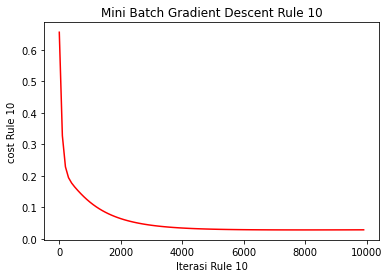

In [ ]:
plt.xlabel("Iterasi Rule 10")
plt.ylabel("cost Rule 10")
plt.title("Mini Batch Gradient Descent Rule 10")
plt.plot(mb_iterasi_rule10_list,mb_cost_rule10_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule10

0.02861680722773975

In [ ]:
mb_b0_rule10

0.37208426343941625

In [ ]:
mb_bpoly_rule10

array([ 0.54930796,  0.50152153, -0.70584078])

In [ ]:
data_rule_10

Age  Weight   Height  BodyFat
56    58  82.327  172.720     20.4
79    66  77.678  175.895     18.8
82    64  86.296  184.785     18.4
228   56  79.152  176.530     14.9
229   56  76.090  173.990     17.0
231   57  82.667  182.245     16.1
232   58  79.605  181.610     15.4
235   62  76.544  171.450     18.6

In [ ]:
X10=np.array(data_rule_10.iloc[::,:-1])
X10

array([[ 58.   ,  82.327, 172.72 ],
       [ 66.   ,  77.678, 175.895],
       [ 64.   ,  86.296, 184.785],
       [ 56.   ,  79.152, 176.53 ],
       [ 56.   ,  76.09 , 173.99 ],
       [ 57.   ,  82.667, 182.245],
       [ 58.   ,  79.605, 181.61 ],
       [ 62.   ,  76.544, 171.45 ]])

In [ ]:
Y10=np.array(data_rule_10.iloc[:,3])
Y10

array([20.4, 18.8, 18.4, 14.9, 17. , 16.1, 15.4, 18.6])

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X10_poly = poly_reg.fit_transform(X10)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X10_poly, Y10) 
# Proses Training Model
poly_reg.fit(X10, Y10) 

# Memprediksi hasil dengan regresi polynomial
y10_pred=lin_reg_2.predict(poly_reg.fit_transform(X10))
y10_pred

data_rule_10['pred'] = y10_pred
data_rule_10

Age  Weight   Height  BodyFat  pred
56    58  82.327  172.720     20.4  20.4
79    66  77.678  175.895     18.8  18.8
82    64  86.296  184.785     18.4  18.4
228   56  79.152  176.530     14.9  14.9
229   56  76.090  173.990     17.0  17.0
231   57  82.667  182.245     16.1  16.1
232   58  79.605  181.610     15.4  15.4
235   62  76.544  171.450     18.6  18.6

##Rule 11

In [ ]:
rule_11 = df_fuzz[df_fuzz['Rule']=="Jika X1 Paruhbaya X2 Normal X3 Tinggi maka Y overweight"]
index=rule_11.index
data_rule_11=df_fuzz.iloc[index,:4]
data_rule_11

Age  Weight   Height  BodyFat
98    46  70.987  173.355     17.8
105   43  75.069  173.990     18.0
115   40  71.668  175.895     16.7
123   47  68.719  169.545     16.0
127   43  69.059  172.085     17.4
129   42  74.956  177.165     14.9
219   53  70.080  175.895     15.0

In [ ]:
data_rule_11.to_csv('hasilrule11.csv')

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule11=pd.read_csv('hasilrule11.csv',sep=',')
df_rule11

Unnamed: 0  Age  Weight   Height  BodyFat
0          98   46  70.987  173.355     17.8
1         105   43  75.069  173.990     18.0
2         115   40  71.668  175.895     16.7
3         123   47  68.719  169.545     16.0
4         127   43  69.059  172.085     17.4
5         129   42  74.956  177.165     14.9
6         219   53  70.080  175.895     15.0

In [ ]:
df_rule11=df_rule11.drop(columns=['Unnamed: 0'])
df_rule11

Age  Weight   Height  BodyFat
0   46  70.987  173.355     17.8
1   43  75.069  173.990     18.0
2   40  71.668  175.895     16.7
3   47  68.719  169.545     16.0
4   43  69.059  172.085     17.4
5   42  74.956  177.165     14.9
6   53  70.080  175.895     15.0

In [ ]:
from sklearn import preprocessing
sx11 = preprocessing.MinMaxScaler()
sy11 = preprocessing.MinMaxScaler()

scaled_X11 = sx11.fit_transform(data_rule_11.drop('BodyFat',axis='columns'))
scaled_y11 = sy11.fit_transform(data_rule_11['BodyFat'].values.reshape(rule_11.shape[0],1))

scaled_X11

array([[0.46153846, 0.35716535, 0.5       ],
       [0.23076923, 1.        , 0.58333333],
       [0.        , 0.46440945, 0.83333333],
       [0.53846154, 0.        , 0.        ],
       [0.23076923, 0.05354331, 0.33333333],
       [0.15384615, 0.98220472, 1.        ],
       [1.        , 0.21433071, 0.83333333]])

In [ ]:
scaled_y11_reshape=scaled_y11.reshape(scaled_y11.shape[0],)
scaled_y11_reshape

array([0.93548387, 1.        , 0.58064516, 0.35483871, 0.80645161,
       0.        , 0.03225806])

In [ ]:
def mini_batch_gradient_descent_rule11(X11, y11, iterasi, batch_size = 5, learning_rate = 0.001):

    jumlah_variabel_rule11 = X11.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule11 = np.ones(shape=(jumlah_variabel_rule11))       # b1, b2, ... b(jumlah variabel)
    b0_rule11 = 0                                         # b0 atau bias
    n = X11.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule11_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule11_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule11_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule11 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X11_smntr = X11[random_indices]
        y11_smntr = y11[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule11 = X11_smntr[j:j+batch_size]
            yj_rule11 = y11_smntr[j:j+batch_size]
            
            y11_pred = np.dot(bpoly_rule11, Xj_rule11.T) + b0_rule11          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule11_grad = -(2/len(Xj_rule11))*(Xj_rule11.T.dot(yj_rule11-y11_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule11_grad = -(2/len(Xj_rule11))*np.sum(yj_rule11-y11_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule11 = bpoly_rule11 - learning_rate * bpoly_rule11_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule11 = b0_rule11 - learning_rate * b0_rule11_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule11 in range(jumlah_variabel_rule11):
                bp_rule11=bpoly_rule11[jv_rule11]
                bp.append(bp_rule11)
            b_rule11=[b0_rule11]+bp
        
            cost_rule11 = np.mean(np.square(yj_rule11-y11_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule11_list.append(cost_rule11)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule11_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule11_list.append(b_rule11)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule11, b0_rule11, cost_rule11, b_rule11_list, cost_rule11_list, iterasi_rule11_list  # Output

In [ ]:
import time
mulai_rule11 = time.time()
mb_bpoly_rule11, mb_b0_rule11, mb_cost_rule11, mb_b_rule11_list, mb_cost_rule11_list, mb_iterasi_rule11_list=mini_batch_gradient_descent_rule11 (scaled_X11, 
                                                                                                                                        scaled_y11_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 5, 
                                                                                                                                        learning_rate = 0.001)
selesai_rule11 = time.time()
waktu_komputasi_rule11 = (selesai_rule11 - mulai_rule11)
print("Waktu Komputasi Rule 11: ",waktu_komputasi_rule11)

Waktu Komputasi Rule 11:  2.467573881149292


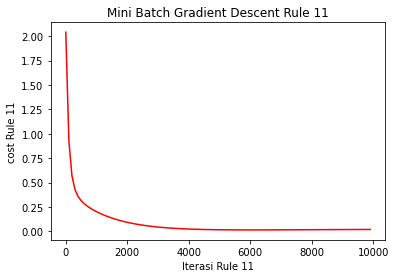

In [ ]:
plt.xlabel("Iterasi Rule 11")
plt.ylabel("cost Rule 11")
plt.title("Mini Batch Gradient Descent Rule 11")
plt.plot(mb_iterasi_rule11_list,mb_cost_rule11_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule11

0.02036577399757177

In [ ]:
mb_b0_rule11

0.7278587329873968

In [ ]:
mb_bpoly_rule11

array([-0.32154053,  0.38234364, -0.51685153])

In [ ]:
data_rule_11

Age  Weight   Height  BodyFat
98    46  70.987  173.355     17.8
105   43  75.069  173.990     18.0
115   40  71.668  175.895     16.7
123   47  68.719  169.545     16.0
127   43  69.059  172.085     17.4
129   42  74.956  177.165     14.9
219   53  70.080  175.895     15.0

In [ ]:
X11=np.array(data_rule_11.iloc[::,:-1])
X11

array([[ 46.   ,  70.987, 173.355],
       [ 43.   ,  75.069, 173.99 ],
       [ 40.   ,  71.668, 175.895],
       [ 47.   ,  68.719, 169.545],
       [ 43.   ,  69.059, 172.085],
       [ 42.   ,  74.956, 177.165],
       [ 53.   ,  70.08 , 175.895]])

In [ ]:
Y11=np.array(data_rule_11.iloc[:,3])
Y11

array([17.8, 18. , 16.7, 16. , 17.4, 14.9, 15. ])

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X11_poly = poly_reg.fit_transform(X11)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X11_poly, Y11) 
# Proses Training Model
poly_reg.fit(X11, Y11) 

# Memprediksi hasil dengan regresi polynomial
y11_pred=lin_reg_2.predict(poly_reg.fit_transform(X11))
y11_pred

data_rule_11['pred'] = y11_pred
data_rule_11

Age  Weight   Height  BodyFat  pred
98    46  70.987  173.355     17.8  17.8
105   43  75.069  173.990     18.0  18.0
115   40  71.668  175.895     16.7  16.7
123   47  68.719  169.545     16.0  16.0
127   43  69.059  172.085     17.4  17.4
129   42  74.956  177.165     14.9  14.9
219   53  70.080  175.895     15.0  15.0

##Rule 12

In [ ]:
rule_12 = df_fuzz[df_fuzz['Rule']=="Jika X1 Paruhbaya X2 Normal X3 Tinggi maka Y atletik"]
index=rule_12.index
data_rule_12=df_fuzz.iloc[index,:4]
data_rule_12

Age  Weight   Height  BodyFat
47    39  67.358  180.975      5.6
49    47  57.833  169.545      4.0
51    40  63.163  175.260      6.6
53    49  69.286  186.690      6.3
54    42  61.802  171.450      3.9
68    54  70.420  175.895      6.3
223   55  64.523  170.815      5.2

In [ ]:
data_rule_12.to_csv('hasilrule12.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule12=pd.read_csv('hasilrule12.csv',sep=',')
df_rule12

Unnamed: 0  Age  Weight   Height  BodyFat
0          47   39  67.358  180.975      5.6
1          49   47  57.833  169.545      4.0
2          51   40  63.163  175.260      6.6
3          53   49  69.286  186.690      6.3
4          54   42  61.802  171.450      3.9
5          68   54  70.420  175.895      6.3
6         223   55  64.523  170.815      5.2

In [ ]:
df_rule12=df_rule12.drop(columns=['Unnamed: 0'])
df_rule12

Age  Weight   Height  BodyFat
0   39  67.358  180.975      5.6
1   47  57.833  169.545      4.0
2   40  63.163  175.260      6.6
3   49  69.286  186.690      6.3
4   42  61.802  171.450      3.9
5   54  70.420  175.895      6.3
6   55  64.523  170.815      5.2

In [ ]:
from sklearn import preprocessing
sx12 = preprocessing.MinMaxScaler()
sy12 = preprocessing.MinMaxScaler()

scaled_X12 = sx12.fit_transform(data_rule_12.drop('BodyFat',axis='columns'))
scaled_y12 = sy12.fit_transform(data_rule_12['BodyFat'].values.reshape(rule_12.shape[0],1))

scaled_X12

array([[0.        , 0.75673314, 0.66666667],
       [0.5       , 0.        , 0.        ],
       [0.0625    , 0.42345277, 0.33333333],
       [0.625     , 0.90990705, 1.        ],
       [0.1875    , 0.31532534, 0.11111111],
       [0.9375    , 1.        , 0.37037037],
       [1.        , 0.53150075, 0.07407407]])

In [ ]:
scaled_y12_reshape=scaled_y12.reshape(scaled_y12.shape[0],)
scaled_y12_reshape

array([0.62962963, 0.03703704, 1.        , 0.88888889, 0.        ,
       0.88888889, 0.48148148])

In [ ]:
def mini_batch_gradient_descent_rule12(X12, y12, iterasi, batch_size = 5, learning_rate = 0.001):

    jumlah_variabel_rule12 = X12.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule12 = np.ones(shape=(jumlah_variabel_rule12))       # b1, b2, ... b(jumlah variabel)
    b0_rule12 = 0                                         # b0 atau bias
    n = X12.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule12_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule12_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule12_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule12 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X12_smntr = X12[random_indices]
        y12_smntr = y12[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule12 = X12_smntr[j:j+batch_size]
            yj_rule12 = y12_smntr[j:j+batch_size]
            
            y12_pred = np.dot(bpoly_rule12, Xj_rule12.T) + b0_rule12          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule12_grad = -(2/len(Xj_rule12))*(Xj_rule12.T.dot(yj_rule12-y12_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule12_grad = -(2/len(Xj_rule12))*np.sum(yj_rule12-y12_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule12 = bpoly_rule12 - learning_rate * bpoly_rule12_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule12 = b0_rule12 - learning_rate * b0_rule12_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule12 in range(jumlah_variabel_rule12):
                bp_rule12=bpoly_rule12[jv_rule12]
                bp.append(bp_rule12)
            b_rule12=[b0_rule12]+bp
        
            cost_rule12 = np.mean(np.square(yj_rule12-y12_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule12_list.append(cost_rule12)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule12_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule12_list.append(b_rule12)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule12, b0_rule12, cost_rule12, b_rule12_list, cost_rule12_list, iterasi_rule12_list  # Output

In [ ]:
import time
mulai_rule12 = time.time()
mb_bpoly_rule12, mb_b0_rule12, mb_cost_rule12, mb_b_rule12_list, mb_cost_rule12_list, mb_iterasi_rule12_list=mini_batch_gradient_descent_rule12 (scaled_X12, 
                                                                                                                                        scaled_y12_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 5, 
                                                                                                                                        learning_rate = 0.001)
selesai_rule12 = time.time()
waktu_komputasi_rule12 = (selesai_rule12 - mulai_rule12)
print("Waktu Komputasi Rule 12: ",waktu_komputasi_rule12)

Waktu Komputasi Rule 12:  2.537588357925415


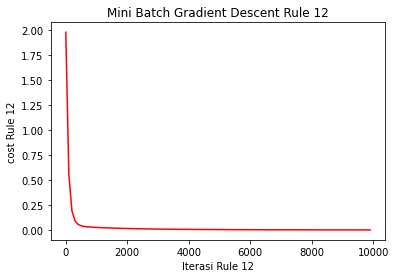

In [ ]:
plt.xlabel("Iterasi Rule 12")
plt.ylabel("cost Rule 12")
plt.title("Mini Batch Gradient Descent Rule 12")
plt.plot(mb_iterasi_rule12_list,mb_cost_rule12_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule12

0.0020208918179385887

In [ ]:
mb_b0_rule12

0.1142417471020454

In [ ]:
mb_bpoly_rule12

array([0.03952359, 0.52972128, 0.32751347])

In [ ]:
data_rule_12

Age  Weight   Height  BodyFat
47    39  67.358  180.975      5.6
49    47  57.833  169.545      4.0
51    40  63.163  175.260      6.6
53    49  69.286  186.690      6.3
54    42  61.802  171.450      3.9
68    54  70.420  175.895      6.3
223   55  64.523  170.815      5.2

In [ ]:
X12=np.array(data_rule_12.iloc[::,:-1])
X12

array([[ 39.   ,  67.358, 180.975],
       [ 47.   ,  57.833, 169.545],
       [ 40.   ,  63.163, 175.26 ],
       [ 49.   ,  69.286, 186.69 ],
       [ 42.   ,  61.802, 171.45 ],
       [ 54.   ,  70.42 , 175.895],
       [ 55.   ,  64.523, 170.815]])

In [ ]:
Y12=np.array(data_rule_12.iloc[:,3])
Y12

array([5.6, 4. , 6.6, 6.3, 3.9, 6.3, 5.2])

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X12_poly = poly_reg.fit_transform(X12)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X12_poly, Y12) 
# Proses Training Model
poly_reg.fit(X12, Y12) 

# Memprediksi hasil dengan regresi polynomial
y12_pred=lin_reg_2.predict(poly_reg.fit_transform(X12))
y12_pred

data_rule_12['pred'] = y12_pred
data_rule_12

Age  Weight   Height  BodyFat  pred
47    39  67.358  180.975      5.6   5.6
49    47  57.833  169.545      4.0   4.0
51    40  63.163  175.260      6.6   6.6
53    49  69.286  186.690      6.3   6.3
54    42  61.802  171.450      3.9   3.9
68    54  70.420  175.895      6.3   6.3
223   55  64.523  170.815      5.2   5.2

##Rule 13

In [ ]:
rule_13 = df_fuzz[df_fuzz['Rule']=="Jika X1 Muda X2 Berat X3 Tinggi maka Y normal"]
index=rule_13.index
data_rule_13=df_fuzz.iloc[index,:4]
data_rule_13

Age  Weight   Height  BodyFat
7     25  79.832  184.150     12.4
9     23  89.925  186.690     11.7
30    32  82.554  187.325     11.9
32    27  76.203  180.975     11.8
161   33  88.904  185.420     14.6
162   33  83.574  174.625     13.0

In [ ]:
data_rule_13.to_csv('hasilrule13.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule13=pd.read_csv('hasilrule13.csv',sep=',')
df_rule13

Unnamed: 0  Age  Weight   Height  BodyFat
0           7   25  79.832  184.150     12.4
1           9   23  89.925  186.690     11.7
2          30   32  82.554  187.325     11.9
3          32   27  76.203  180.975     11.8
4         161   33  88.904  185.420     14.6
5         162   33  83.574  174.625     13.0

In [ ]:
df_rule13=df_rule13.drop(columns=['Unnamed: 0'])
df_rule13

Age  Weight   Height  BodyFat
0   25  79.832  184.150     12.4
1   23  89.925  186.690     11.7
2   32  82.554  187.325     11.9
3   27  76.203  180.975     11.8
4   33  88.904  185.420     14.6
5   33  83.574  174.625     13.0

In [ ]:
from sklearn import preprocessing
sx13 = preprocessing.MinMaxScaler()
sy13 = preprocessing.MinMaxScaler()

scaled_X13 = sx13.fit_transform(data_rule_13.drop('BodyFat',axis='columns'))
scaled_y13 = sy13.fit_transform(data_rule_13['BodyFat'].values.reshape(rule_13.shape[0],1))

scaled_X13

array([[0.2       , 0.26446582, 0.75      ],
       [0.        , 1.        , 0.95      ],
       [0.9       , 0.46283341, 1.        ],
       [0.4       , 0.        , 0.5       ],
       [1.        , 0.92559394, 0.85      ],
       [1.        , 0.53716659, 0.        ]])

In [ ]:
scaled_y13_reshape=scaled_y13.reshape(scaled_y13.shape[0],)
scaled_y13_reshape

array([0.24137931, 0.        , 0.06896552, 0.03448276, 1.        ,
       0.44827586])

In [ ]:
def mini_batch_gradient_descent_rule13(X13, y13, iterasi, batch_size = 5, learning_rate = 0.001):

    jumlah_variabel_rule13 = X13.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule13 = np.ones(shape=(jumlah_variabel_rule13))       # b1, b2, ... b(jumlah variabel)
    b0_rule13 = 0                                         # b0 atau bias
    n = X13.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule13_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule13_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule13_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule13 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X13_smntr = X13[random_indices]
        y13_smntr = y13[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule13 = X13_smntr[j:j+batch_size]
            yj_rule13 = y13_smntr[j:j+batch_size]
            
            y13_pred = np.dot(bpoly_rule13, Xj_rule13.T) + b0_rule13          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule13_grad = -(2/len(Xj_rule13))*(Xj_rule13.T.dot(yj_rule13-y13_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule13_grad = -(2/len(Xj_rule13))*np.sum(yj_rule13-y13_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule13 = bpoly_rule13 - learning_rate * bpoly_rule13_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule13 = b0_rule13 - learning_rate * b0_rule13_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule13 in range(jumlah_variabel_rule13):
                bp_rule13=bpoly_rule13[jv_rule13]
                bp.append(bp_rule13)
            b_rule13=[b0_rule13]+bp
        
            cost_rule13 = np.mean(np.square(yj_rule13-y13_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule13_list.append(cost_rule13)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule13_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule13_list.append(b_rule13)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule13, b0_rule13, cost_rule13, b_rule13_list, cost_rule13_list, iterasi_rule13_list  # Output

In [ ]:
import time
mulai_rule13 = time.time()
mb_bpoly_rule13, mb_b0_rule13, mb_cost_rule13, mb_b_rule13_list, mb_cost_rule13_list, mb_iterasi_rule13_list=mini_batch_gradient_descent_rule13 (scaled_X13, 
                                                                                                                                        scaled_y13_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 5, 
                                                                                                                                        learning_rate = 0.001)
selesai_rule13 = time.time()
waktu_komputasi_rule13 = (selesai_rule13 - mulai_rule13)
print("Waktu Komputasi Rule 13: ",waktu_komputasi_rule13)

Waktu Komputasi Rule 13:  2.409414529800415


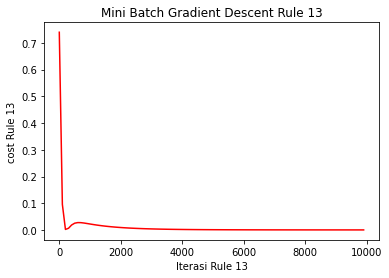

In [ ]:
plt.xlabel("Iterasi Rule 13")
plt.ylabel("cost Rule 13")
plt.title("Mini Batch Gradient Descent Rule 13")
plt.plot(mb_iterasi_rule13_list,mb_cost_rule13_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule13

0.00015656037312825337

In [ ]:
mb_b0_rule13

-0.2299630423098353

In [ ]:
mb_bpoly_rule13

array([0.56819592, 0.31388752, 0.04938062])

In [ ]:
data_rule_13

Age  Weight   Height  BodyFat
7     25  79.832  184.150     12.4
9     23  89.925  186.690     11.7
30    32  82.554  187.325     11.9
32    27  76.203  180.975     11.8
161   33  88.904  185.420     14.6
162   33  83.574  174.625     13.0

In [ ]:
X13=np.array(data_rule_13.iloc[::,:-1])
X13

array([[ 25.   ,  79.832, 184.15 ],
       [ 23.   ,  89.925, 186.69 ],
       [ 32.   ,  82.554, 187.325],
       [ 27.   ,  76.203, 180.975],
       [ 33.   ,  88.904, 185.42 ],
       [ 33.   ,  83.574, 174.625]])

In [ ]:
Y13=np.array(data_rule_13.iloc[:,3])
Y13

array([12.4, 11.7, 11.9, 11.8, 14.6, 13. ])

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X13_poly = poly_reg.fit_transform(X13)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X13_poly, Y13) 
# Proses Training Model
poly_reg.fit(X13, Y13) 

# Memprediksi hasil dengan regresi polynomial
y13_pred=lin_reg_2.predict(poly_reg.fit_transform(X13))
y13_pred

data_rule_13['pred'] = y13_pred
data_rule_13

Age  Weight   Height  BodyFat  pred
7     25  79.832  184.150     12.4  12.4
9     23  89.925  186.690     11.7  11.7
30    32  82.554  187.325     11.9  11.9
32    27  76.203  180.975     11.8  11.8
161   33  88.904  185.420     14.6  14.6
162   33  83.574  174.625     13.0  13.0

#Prediksi

In [ ]:
df_pred=pd.concat([data_rule_1, data_rule_2, data_rule_3, data_rule_4, data_rule_5, data_rule_6, data_rule_7, data_rule_8, data_rule_9, data_rule_10, data_rule_11, data_rule_12, data_rule_13], ignore_index=False)
df_pred.sort_index()

Age    Weight   Height  BodyFat       pred
2     22  69.85300  168.275     25.3  25.300000
3     26  83.80100  183.515     10.4  17.330915
4     24  83.57400  180.975     28.7  25.249046
5     24  95.36800  189.865     20.9  17.497663
6     26  82.10000  177.165     19.2  20.104644
..   ...       ...      ...      ...        ...
246   69  97.74900  179.070     30.2  29.918517
248   72  91.17200  177.165     33.6  29.963015
249   72  84.70800  167.640     29.3  30.412350
250   72  86.52300  179.070     26.0  28.059556
251   70  94.12034  177.800     26.0  29.278165

[215 rows x 5 columns]

In [ ]:
df_fuzz['alpha_predikat']=df_fuzz[['miu_Age','miu_Weight','miu_Height','miu_BodyFat']].min(axis=1)
df_fuzz

Age    Weight   Height  BodyFat Age_fuzz Weight_fuzz Height_fuzz  \
0     23  69.96700  172.085     12.3     Muda      Normal      Tinggi   
1     22  78.58500  183.515      6.1     Muda       Berat      Tinggi   
2     22  69.85300  168.275     25.3     Muda      Normal      Tinggi   
3     26  83.80100  183.515     10.4     Muda       Berat      Tinggi   
4     24  83.57400  180.975     28.7     Muda       Berat      Tinggi   
..   ...       ...      ...      ...      ...         ...         ...   
247   70  60.89500  170.180     11.0      Tua      Normal      Tinggi   
248   72  91.17200  177.165     33.6      Tua       Berat      Tinggi   
249   72  84.70800  167.640     29.3      Tua       Berat      Tinggi   
250   72  86.52300  179.070     26.0      Tua       Berat      Tinggi   
251   70  94.12034  177.800     26.0      Tua       Berat      Tinggi   

    BodyFat_fuzz   miu_Age  miu_Weight  miu_Height  miu_BodyFat  \
0         normal  0.166667    0.000000    0.271186     0.000000   
1        atletik  0.000000    0.343774    0.983039     0.000000   
2       obesitas  0.000000    0.000000    0.000000     0.000000   
3       obesitas  0.666667    0.439267    0.983039     0.000000   
4       obesitas  0.333333    0.439267    0.813559     0.266667   
..           ...       ...         ...         ...          ...   
247       normal  0.846154    0.000000    0.135593     0.000000   
248     obesitas  0.692308    0.592055    0.610169     0.711111   
249     obesitas  0.692308    0.458365    0.000000     0.355556   
250     obesitas  0.692308    0.496562    0.745763     0.088889   
251     obesitas  0.846154    0.649351    0.610169     0.088889   

                                                 Rule  alpha_predikat  
0      Jika X1 Muda X2 Normal X3 Tinggi maka Y normal        0.000000  
1      Jika X1 Muda X2 Berat X3 Tinggi maka Y atletik        0.000000  
2    Jika X1 Muda X2 Normal X3 Tinggi maka Y obesitas        0.000000  
3     Jika X1 Muda X2 Berat X3 Tinggi maka Y obesitas        0.000000  
4     Jika X1 Muda X2 Berat X3 Tinggi maka Y obesitas        0.266667  
..                                                ...             ...  
247     Jika X1 Tua X2 Normal X3 Tinggi maka Y normal        0.000000  
248    Jika X1 Tua X2 Berat X3 Tinggi maka Y obesitas        0.592055  
249    Jika X1 Tua X2 Berat X3 Tinggi maka Y obesitas        0.000000  
250    Jika X1 Tua X2 Berat X3 Tinggi maka Y obesitas        0.088889  
251    Jika X1 Tua X2 Berat X3 Tinggi maka Y obesitas        0.088889  

[252 rows x 14 columns]

In [ ]:
df_fuzz['y_pred_regressi']=df_pred.pred
df_fuzz

Age    Weight   Height  BodyFat Age_fuzz Weight_fuzz Height_fuzz  \
0     23  69.96700  172.085     12.3     Muda      Normal      Tinggi   
1     22  78.58500  183.515      6.1     Muda       Berat      Tinggi   
2     22  69.85300  168.275     25.3     Muda      Normal      Tinggi   
3     26  83.80100  183.515     10.4     Muda       Berat      Tinggi   
4     24  83.57400  180.975     28.7     Muda       Berat      Tinggi   
..   ...       ...      ...      ...      ...         ...         ...   
247   70  60.89500  170.180     11.0      Tua      Normal      Tinggi   
248   72  91.17200  177.165     33.6      Tua       Berat      Tinggi   
249   72  84.70800  167.640     29.3      Tua       Berat      Tinggi   
250   72  86.52300  179.070     26.0      Tua       Berat      Tinggi   
251   70  94.12034  177.800     26.0      Tua       Berat      Tinggi   

    BodyFat_fuzz   miu_Age  miu_Weight  miu_Height  miu_BodyFat  \
0         normal  0.166667    0.000000    0.271186     0.000000   
1        atletik  0.000000    0.343774    0.983039     0.000000   
2       obesitas  0.000000    0.000000    0.000000     0.000000   
3       obesitas  0.666667    0.439267    0.983039     0.000000   
4       obesitas  0.333333    0.439267    0.813559     0.266667   
..           ...       ...         ...         ...          ...   
247       normal  0.846154    0.000000    0.135593     0.000000   
248     obesitas  0.692308    0.592055    0.610169     0.711111   
249     obesitas  0.692308    0.458365    0.000000     0.355556   
250     obesitas  0.692308    0.496562    0.745763     0.088889   
251     obesitas  0.846154    0.649351    0.610169     0.088889   

                                                 Rule  alpha_predikat  \
0      Jika X1 Muda X2 Normal X3 Tinggi maka Y normal        0.000000   
1      Jika X1 Muda X2 Berat X3 Tinggi maka Y atletik        0.000000   
2    Jika X1 Muda X2 Normal X3 Tinggi maka Y obesitas        0.000000   
3     Jika X1 Muda X2 Berat X3 Tinggi maka Y obesitas        0.000000   
4     Jika X1 Muda X2 Berat X3 Tinggi maka Y obesitas        0.266667   
..                                                ...             ...   
247     Jika X1 Tua X2 Normal X3 Tinggi maka Y normal        0.000000   
248    Jika X1 Tua X2 Berat X3 Tinggi maka Y obesitas        0.592055   
249    Jika X1 Tua X2 Berat X3 Tinggi maka Y obesitas        0.000000   
250    Jika X1 Tua X2 Berat X3 Tinggi maka Y obesitas        0.088889   
251    Jika X1 Tua X2 Berat X3 Tinggi maka Y obesitas        0.088889   

     y_pred_regressi  
0                NaN  
1                NaN  
2          25.300000  
3          17.330915  
4          25.249046  
..               ...  
247              NaN  
248        29.963015  
249        30.412350  
250        28.059556  
251        29.278165  

[252 rows x 15 columns]

In [ ]:
#df_fuzz['Pred TSK']=df_fuzz['alpha_predikat']*df_fuzz['y_pred_regressi']/df_fuzz['alpha_predikat'].sum()
df_fuzz['Pred TSK']=df_fuzz['alpha_predikat']*df_fuzz['y_pred_regressi']
df_fuzz

Age    Weight   Height  BodyFat Age_fuzz Weight_fuzz Height_fuzz  \
0     23  69.96700  172.085     12.3     Muda      Normal      Tinggi   
1     22  78.58500  183.515      6.1     Muda       Berat      Tinggi   
2     22  69.85300  168.275     25.3     Muda      Normal      Tinggi   
3     26  83.80100  183.515     10.4     Muda       Berat      Tinggi   
4     24  83.57400  180.975     28.7     Muda       Berat      Tinggi   
..   ...       ...      ...      ...      ...         ...         ...   
247   70  60.89500  170.180     11.0      Tua      Normal      Tinggi   
248   72  91.17200  177.165     33.6      Tua       Berat      Tinggi   
249   72  84.70800  167.640     29.3      Tua       Berat      Tinggi   
250   72  86.52300  179.070     26.0      Tua       Berat      Tinggi   
251   70  94.12034  177.800     26.0      Tua       Berat      Tinggi   

    BodyFat_fuzz   miu_Age  miu_Weight  miu_Height  miu_BodyFat  \
0         normal  0.166667    0.000000    0.271186     0.000000   
1        atletik  0.000000    0.343774    0.983039     0.000000   
2       obesitas  0.000000    0.000000    0.000000     0.000000   
3       obesitas  0.666667    0.439267    0.983039     0.000000   
4       obesitas  0.333333    0.439267    0.813559     0.266667   
..           ...       ...         ...         ...          ...   
247       normal  0.846154    0.000000    0.135593     0.000000   
248     obesitas  0.692308    0.592055    0.610169     0.711111   
249     obesitas  0.692308    0.458365    0.000000     0.355556   
250     obesitas  0.692308    0.496562    0.745763     0.088889   
251     obesitas  0.846154    0.649351    0.610169     0.088889   

                                                 Rule  alpha_predikat  \
0      Jika X1 Muda X2 Normal X3 Tinggi maka Y normal        0.000000   
1      Jika X1 Muda X2 Berat X3 Tinggi maka Y atletik        0.000000   
2    Jika X1 Muda X2 Normal X3 Tinggi maka Y obesitas        0.000000   
3     Jika X1 Muda X2 Berat X3 Tinggi maka Y obesitas        0.000000   
4     Jika X1 Muda X2 Berat X3 Tinggi maka Y obesitas        0.266667   
..                                                ...             ...   
247     Jika X1 Tua X2 Normal X3 Tinggi maka Y normal        0.000000   
248    Jika X1 Tua X2 Berat X3 Tinggi maka Y obesitas        0.592055   
249    Jika X1 Tua X2 Berat X3 Tinggi maka Y obesitas        0.000000   
250    Jika X1 Tua X2 Berat X3 Tinggi maka Y obesitas        0.088889   
251    Jika X1 Tua X2 Berat X3 Tinggi maka Y obesitas        0.088889   

     y_pred_regressi   Pred TSK  
0                NaN        NaN  
1                NaN        NaN  
2          25.300000   0.000000  
3          17.330915   0.000000  
4          25.249046   6.733079  
..               ...        ...  
247              NaN        NaN  
248        29.963015  17.739753  
249        30.412350   0.000000  
250        28.059556   2.494183  
251        29.278165   2.602504  

[252 rows x 16 columns]

In [ ]:
df_fuzz.to_excel('hasil_prediksi.xlsx') 

In [ ]:
x1= df_fuzz.index
y1= df_fuzz.BodyFat
y2= df_fuzz['Pred TSK']

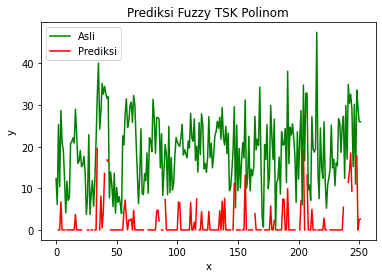

In [ ]:
plt.plot(x1, y1,  label = "Asli",  color='green')
plt.plot(x1, y2, label = "Prediksi", color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Prediksi Fuzzy TSK Polinom')
plt.legend()
plt.show()